### Modelos Ensemble en Machine Learning y su Aplicación en Data Analytics Empresarial

**¿Qué son los modelos Ensemble?**

Los modelos Ensemble, también conocidos como métodos de aprendizaje combinado, son una técnica en Machine Learning que combina múltiples modelos individuales para obtener un mejor rendimiento general. En lugar de depender de un solo modelo, estos métodos aprovechan la diversidad de las predicciones de varios modelos para generar una predicción final más precisa y robusta.

**¿Cómo funcionan?**

Existen diferentes tipos de métodos Ensemble, cada uno con su propio enfoque para combinar las predicciones de los modelos individuales. Entre los más populares se encuentran:

* **Bagging:** Entrena diferentes modelos con subconjuntos aleatorios del conjunto de datos original.
* **Boosting:** Entrena una serie de modelos secuencialmente, donde cada modelo posterior se enfoca en corregir los errores del modelo anterior.
* **Stacking:** Entrena diferentes modelos y luego utiliza un meta-modelo para combinar sus predicciones.

**Beneficios de los Modelos Ensemble:**

* **Mayor precisión:** Al combinar las predicciones de varios modelos, se reduce el error general y se aumenta la precisión.
* **Robustez:** Los modelos Ensemble son menos propensos a sufrir errores específicos de un modelo individual.
* **Mejor generalización:** Estos modelos pueden generalizar mejor a nuevos datos que no fueron vistos durante el entrenamiento.

**Aplicaciones en Data Analytics Empresarial:**

Los modelos Ensemble se pueden aplicar a una amplia gama de problemas de Data Analytics Empresarial, como por ejemplo:

* **Predicción de la demanda:** Se pueden usar para predecir la demanda de productos o servicios, lo que ayuda a optimizar la producción y el inventario.
* **Detección de fraude:** Los modelos Ensemble pueden identificar patrones de comportamiento fraudulento en transacciones financieras.
* **Segmentación de clientes:** Se pueden usar para segmentar clientes en diferentes grupos con base en sus características y comportamiento, lo que permite realizar campañas de marketing más personalizadas.
* **Análisis de riesgos:** Los modelos Ensemble pueden ayudar a evaluar el riesgo crediticio de los clientes o el riesgo de que ocurra un evento determinado.

**En resumen, los modelos Ensemble son una herramienta poderosa que puede ayudar a mejorar significativamente la precisión y la robustez de los análisis de datos en el ámbito empresarial.**

**Aquí hay algunos ejemplos específicos de cómo se pueden usar los modelos Ensemble en diferentes áreas de negocio:**

* **Marketing:** Los modelos Ensemble pueden usarse para predecir la probabilidad de que un cliente responda a una campaña de marketing, lo que permite optimizar el presupuesto de marketing y dirigirse a los clientes más propensos a comprar.
* **Ventas:** Los modelos Ensemble pueden usarse para predecir las ventas futuras, lo que ayuda a optimizar la planificación de la producción y la gestión del inventario.
* **Finanzas:** Los modelos Ensemble pueden usarse para detectar fraudes en transacciones financieras, lo que ayuda a proteger a las empresas de pérdidas financieras.
* **Recursos Humanos:** Los modelos Ensemble pueden usarse para predecir la rotación de empleados, lo que ayuda a las empresas a identificar y retener a los empleados de alto rendimiento.

## Ejemplos de Bagging, Boosting y Stacking con Algoritmos Específicos

**Bagging:**

* **Random Forest:** Un conjunto de árboles de decisión donde cada árbol se entrena con una muestra aleatoria del conjunto de datos.
* **Bootstrap Aggregating (Bagging):** Un método general que se puede aplicar a cualquier tipo de modelo de aprendizaje automático.

**Boosting:**

* **AdaBoost:** Un algoritmo que entrena una serie de árboles de decisión débiles, donde cada árbol posterior se enfoca en corregir los errores del árbol anterior.
* **Gradient Boosting:** Un algoritmo que utiliza un modelo de regresión lineal para ajustar las predicciones de los modelos anteriores.
* **XGBoost:** Una implementación eficiente de Gradient Boosting con regularización para evitar el sobreajuste.

**Stacking:**

* **Stacking con Regresión Lineal:** Se entrenan diferentes modelos de aprendizaje automático y se utilizan sus predicciones como características para un modelo de regresión lineal que genera la predicción final.
* **Stacking con Redes Neuronales:** Se entrenan diferentes modelos de aprendizaje automático y se utilizan sus predicciones como características para una red neuronal que genera la predicción final.

**Algoritmos específicos para cada método:**

**Bagging:**

* **Árboles de decisión:** Son un algoritmo popular para clasificación y regresión.
* **K-Nearest Neighbors (KNN):** Un algoritmo simple y efectivo para clasificación y regresión.
* **Redes neuronales:** Se pueden usar redes neuronales para la clasificación y la regresión.

**Boosting:**

* **Árboles de decisión:** Son el tipo de modelo más común utilizado en Boosting.
* **Redes neuronales:** Se pueden usar redes neuronales para Boosting.

**Stacking:**

* **Cualquier modelo de aprendizaje automático:** Se puede usar cualquier tipo de modelo de aprendizaje automático en Stacking.

**En resumen, existen muchos algoritmos específicos que se pueden usar para implementar cada método Ensemble. La elección del algoritmo adecuado dependerá del tipo de problema que se desea resolver y del conjunto de datos disponible.**

## Resumen de variables predictoras y variables a predecir en Machine Learning

**En Machine Learning, las variables predictoras (también conocidas como variables independientes o características) son las que se utilizan para predecir una variable objetivo (también conocida como variable dependiente).** Las variables predictoras pueden ser numéricas, categóricas o una combinación de ambas.

**La variable objetivo es la variable que se quiere predecir.** Puede ser una variable numérica, como el precio de una casa, o una variable categórica, como si un paciente tiene una enfermedad o no.

**El objetivo de un modelo de Machine Learning es aprender la relación entre las variables predictoras y la variable objetivo.** El modelo utiliza esta relación para hacer predicciones sobre nuevos datos que no ha visto antes.

**Existen diferentes tipos de modelos de Machine Learning que se pueden utilizar para predecir diferentes tipos de variables objetivo.** Algunos de los tipos de modelos más comunes son:

* **Regresión:** Se utiliza para predecir variables numéricas.
* **Clasificación:** Se utiliza para predecir variables categóricas.
* **Agrupamiento:** Se utiliza para agrupar datos en función de sus similitudes.

**La elección del tipo de modelo de Machine Learning adecuado depende del tipo de variable objetivo que se quiere predecir y del tipo de datos que se tienen disponibles.**

**Aquí hay algunos ejemplos de variables predictoras y variables a predecir en Machine Learning:**

**Ejemplo 1:**

* **Variable predictora:** Edad, sexo, altura, peso
* **Variable a predecir:** Riesgo de sufrir una enfermedad cardíaca

**Ejemplo 2:**

* **Variable predictora:** Historial de compras, datos demográficos
* **Variable a predecir:** Probabilidad de que un cliente compre un producto

**Ejemplo 3:**

* **Variable predictora:** Texto de un correo electrónico
* **Variable a predecir:** Si el correo electrónico es spam o no

**Las variables predictoras y la variable objetivo son dos conceptos fundamentales en Machine Learning.** La elección del tipo de modelo de Machine Learning adecuado depende del tipo de variable objetivo que se quiere predecir y del tipo de datos que se tienen disponibles.

### Problema: predicción de humedad en fotografías de granos de arroz

La predicción de los niveles de humedad en granos es crucial por diversas razones que impactan la calidad, seguridad y rentabilidad del producto a lo largo de la cadena de suministro:

**1. Control de Calidad:**

* **Deterioro:** La humedad excesiva (>14%) acelera el crecimiento de hongos, bacterias e insectos, deteriorando la calidad del grano y haciéndolo susceptible a pudriciones, toxinas y malos olores.
* **Germinación:** Humedad óptima (13-14%) en granos almacenados a largo plazo previene la germinación prematura, lo que reduce el valor comercial.
* **Secado artificial:** Predecir la humedad permite ajustar el proceso de secado artificial para obtener el nivel ideal (12-14%) y evitar costos y daños por exceso o defecto de secado.

**2. Seguridad Alimentaria:**

* **Hongos y toxinas:** La humedad elevada (>14%) favorece el desarrollo de hongos y toxinas como aflatoxinas, que son perjudiciales para la salud humana y animal.
* **Control de plagas:** La humedad alta atrae insectos como gorgojos y polillas, que contaminan y dañan los granos.

**3. Optimización de la Cadena de Suministro:**

* **Almacenamiento:** Predecir la humedad ayuda a determinar el método de almacenamiento adecuado (silos, contenedores, etc.) y las condiciones óptimas (temperatura, ventilación) para mantener la calidad del grano.
* **Transporte:** Permite elegir el método de transporte adecuado (contenedores herméticos, ventilación) para evitar daños por condensación o pérdida de humedad.
* **Comercialización:** La información sobre la humedad es clave para la clasificación, fijación de precios y negociación en la venta de granos.

**4. Rentabilidad:**

* **Minimizar pérdidas:** La correcta gestión de la humedad reduce las pérdidas por deterioro, pudriciones y ataques de plagas.
* **Optimizar procesos:** Ajustar el secado y almacenamiento a las necesidades específicas reduce costos operativos.
* **Mejorar precio:** Granos con niveles de humedad óptimos obtienen mejores precios en el mercado.

### Datos

- **Variables predictoras:** $X$, histogramas de las fotografías de los granos de arroz.
- **Variable objetivo:**  $y$, nivel de humedad ($y\in \{10,11,12,13,14,15,16\}$).

- Modelos: se usarán modelos ensemble para aprender la relación entre las variables predictoras, histogramas de las imágenes y la humead.
- Es un problema supervisado, conocemos las variables de entrada $X$ y la variable objetivo $y$, nuestro modelo de ML construirá la función $y=f(X)$.
  - El problema puede ser tratado de forma natural como un problema de clasificación, cada clase viene dada por: $y\in \{10,11,12,13,14,15,16\}$.
  - Como ejercicio, trataremos el problema como una regresión, redondearemos la salidad predicha por el modelo $\hat y$  al entero más cercano.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

In [ ]:
# Nuestra imagen está en escala de grises
img = Image.open('data/H14_093304.jpg')  # cargar imagen
img.size  # tamaño de la imagen

(4128, 3096)

In [ ]:
# obtenemos el centro de la imagen
w, h = (np.array(img.size) // 2)
w, h

(2064, 1548)

In [ ]:
# Recorte de la imagen, a partir del centro
# nuevas dimensiones (tamaño de recorte)
cw, ch = 660, 660  # nuevo tamaño

# recorte a partir del centro mitad nueveo alto/ancho
box = (w-cw)//2, (h-ch)//2, (w+cw)//2, (h+ch)//2
box  # caja de recorte

(702, 444, 1362, 1104)

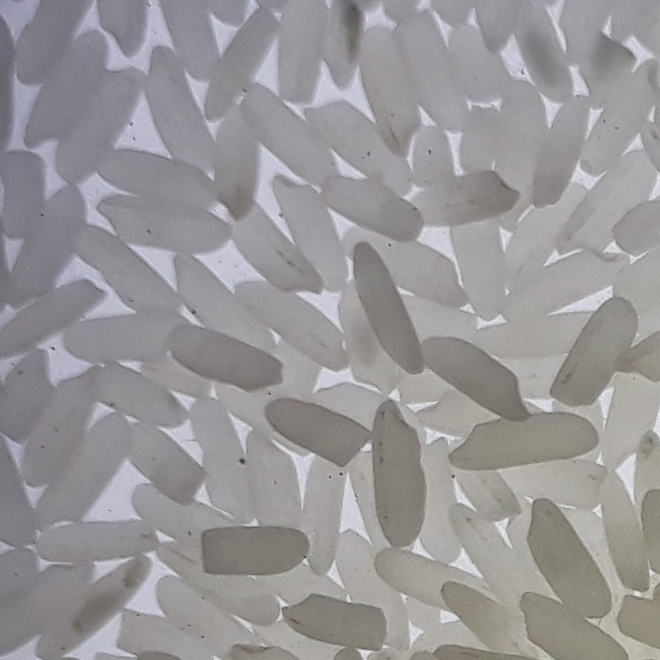

In [ ]:
img_cropped = img.crop(box)
img_cropped

### Histograma de la imagen: variables de entrada (predictores)

- El histograma se visualiza como una gráfica de barras, donde el eje $x$ representa los valores de intensidad y el eje Y representa el número de píxeles para cada valor de intensidad.

- El número de bins es un parámetro que se puede elegir, pero un valor común es 256 **(panel izquierdo)**, lo que significa que se crea un bin para cada valor de intensidad posible.

- Los valores de intensidad de los píxeles, que normalmente van de 0 a 255 en imágenes de 8 bits, se dividen en un número determinado de intervalos o "bins", en nuestro ejemplo se usan 44 bines **(panel izquierdo)**.

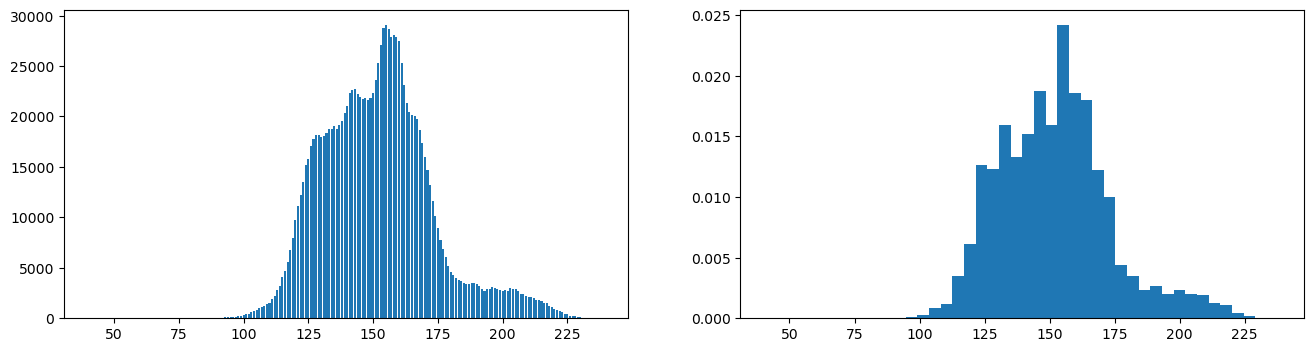

In [ ]:
# Transformar array 2D a 1D
pixels = np.array(img_cropped).flatten()
# Construir diagrama de barras con 256 bins
# En una imagen en escala de grises cada pixel contiente un valor entre 0 y 255
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.bar(*np.unique(pixels, return_counts=True))

# Construir histograma con 44 bins
plt.subplot(1,2,2)
h = plt.hist(pixels, bins=44, density=True)

In [ ]:
# Las alturas de histograma serán nuestro vector de entrada X
h[0], len(h[0])  # h[0] altura del histograma

(array([5.12741629e-07, 5.12741629e-07, 3.41827753e-07, 1.02548326e-06,
        8.54569382e-07, 3.41827753e-07, 1.88005264e-06, 2.90553590e-06,
        7.86203832e-06, 1.36731101e-05, 3.11063255e-05, 4.75140577e-05,
        1.28527235e-04, 2.85084346e-04, 8.20386607e-04, 1.20528466e-03,
        3.47279906e-03, 6.10606915e-03, 1.26219898e-02, 1.23066537e-02,
        1.59059290e-02, 1.32931686e-02, 1.51551043e-02, 1.86971235e-02,
        1.59069545e-02, 2.41826044e-02, 1.85904733e-02, 1.79627066e-02,
        1.22603360e-02, 1.00382847e-02, 4.43042951e-03, 3.49365055e-03,
        2.37057547e-03, 2.68334786e-03, 2.04071169e-03, 2.36630262e-03,
        1.96123673e-03, 1.91132988e-03, 1.26322446e-03, 1.07727016e-03,
        4.41470543e-04, 2.11078637e-04, 4.34121246e-05, 8.20386607e-06]),
 44)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/marsgr6/r-scripts/master/data/G03_cropG_H_660_660_44_bins.csv')
data.humidity = data.humidity.astype(str)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,humidity
0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.012158,0.044333,0.354619,0.098181,0.124926,0.136753,0.008118,0.000009,0.000000,10
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.014039,0.018889,0.141064,0.151785,0.089501,0.119041,0.040481,0.001417,0.000000,10
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.018064,0.023848,0.141680,0.120306,0.108169,0.121783,0.027558,0.000676,0.000000,10
3,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.029847,0.022650,0.035885,0.074686,0.087595,0.107312,0.082734,0.014666,0.000054,10
4,0.0,0.0,0.0,0.000009,0.0,0.000009,0.000027,0.000018,0.000045,0.00009,...,0.015860,0.043084,0.339896,0.143472,0.115284,0.128973,0.035604,0.001162,0.000000,10


In [ ]:
data.iloc[:,:-1].describe()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.000014,0.000028,0.000065,0.000128,0.000214,0.000966,0.005213,0.001067,0.000116,0.000171,...,0.027661,0.031278,0.087876,0.190515,0.112837,0.103457,0.116627,0.032822,0.001430,0.000002
std,0.000114,0.000201,0.000394,0.000689,0.001124,0.007024,0.035924,0.006590,0.000315,0.000339,...,0.023420,0.031301,0.091787,0.095035,0.032029,0.020023,0.048207,0.023983,0.002411,0.000012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.007444,0.007756,0.011540,0.028937,0.037259,0.043105,0.007829,0.000086,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.012980,0.014053,0.027827,0.125638,0.089162,0.090107,0.082844,0.010775,0.000047,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000015,...,0.020033,0.019908,0.046835,0.171026,0.108850,0.102421,0.123879,0.030658,0.000638,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000033,0.000081,0.000188,...,0.028884,0.037133,0.108597,0.247400,0.133112,0.114255,0.151436,0.049145,0.001721,0.000000
max,0.001474,0.002317,0.003440,0.004835,0.009255,0.090649,0.377729,0.075797,0.002356,0.001916,...,0.141751,0.253941,0.415862,0.537803,0.236872,0.181483,0.234865,0.116686,0.018232,0.000134


### Dimensión de nuestro datos de entrada:

- $X$: 218 observaciones (imágenes), 44 columnas (variables), cada uno de los bines de las imágenes.
- Etiquetas $y$: tantas como observaciones, 218, con valores únicos $y \in \{10,11, \dots, 16 \}$, cada nivel de humedad.

In [ ]:
data.iloc[:,:-1].shape

(218, 44)

### Visualización del dataset

- Un heatmap nos da una mirada completa de las variables de entrada y las clases (niveles de humedad) presentes.

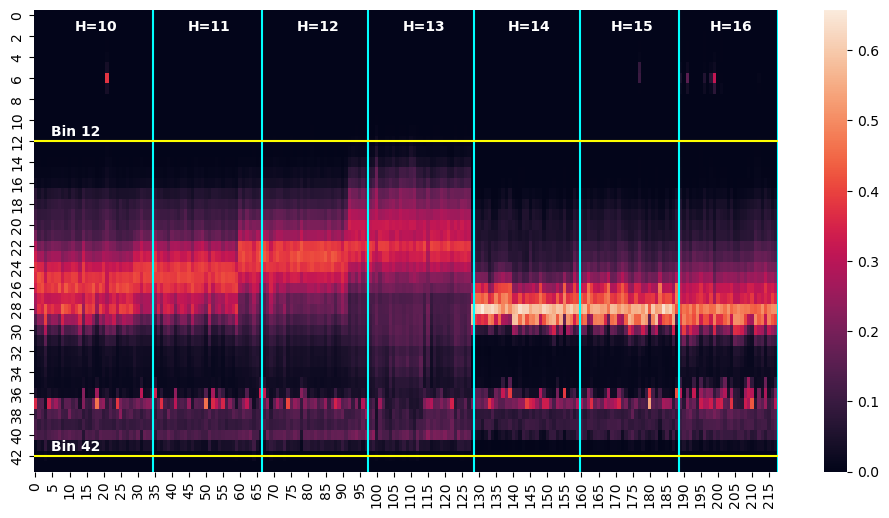

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data.iloc[:,:-1].T)
t = list(data.humidity.unique())
x = list(data.humidity.value_counts().cumsum())
c = list(data.humidity.value_counts())
plt.vlines(x,
           data.humidity.nunique()*[0],
           data.shape[0]*data.humidity.nunique(), colors="cyan")
plt.hlines([12.5, 42.5], [0, 0], [218, 218], colors="yellow")
[plt.text(v[0]-v[2]//2-6, 2, 'H='+v[1], c='white', fontweight="bold") for v in zip(x, t, c)];
plt.text(5, 12, 'Bin 12', c='white', fontweight="bold");
plt.text(5, 42, 'Bin 42', c='white', fontweight="bold");
plt.show()

## Definición de un Problema de Clasificación Multi-Clase Balanceado

Un problema de clasificación multi-clase balanceado se refiere a una tarea de aprendizaje automático donde se busca clasificar datos en diferentes categorías, teniendo en cuenta que cada categoría tiene un número similar de ejemplos.

**En este tipo de problemas, la distribución de las clases es uniforme o casi uniforme, a diferencia de los problemas desbalanceados donde una o pocas clases son dominantes.**

**Características:**

* **Múltiples clases:** El objetivo es clasificar los datos en más de dos categorías.
* **Balance de clases:** Cada clase tiene un número similar de ejemplos, evitando el sesgo hacia las clases mayoritarias.
* **Importancia del balance:** El balance de clases es crucial para obtener un modelo preciso y confiable, ya que un modelo entrenado con un conjunto de datos desbalanceado podría tender a clasificar la mayoría de los ejemplos en la clase dominante.

En un problema de clasificación multi-clase desbalanceado, un modelo sin técnicas de balanceo puede:

* **Predominar hacia las clases mayoritarias:** Ignorando las características de las clases minoritarias y generando un alto error en su clasificación.
* **Sesgo en las métricas de evaluación:** Las métricas tradicionales como la precisión general pueden ser engañosas, ya que el modelo podría tener un alto rendimiento para las clases mayoritarias pero un bajo rendimiento para las minoritarias.

**Técnicas de Balanceo:**

Para abordar un problema de clasificación multi-clase balanceado, se pueden aplicar diferentes técnicas, como:

* **Submuestreo:** Eliminar aleatoriamente ejemplos de las clases mayoritarias para igualar el número de ejemplos en cada clase.
* **Sobremuestreo:** Duplicar aleatoriamente ejemplos de las clases minoritarias para aumentar su número.
* **Generación sintética de datos:** Crear nuevos ejemplos de las clases minoritarias utilizando técnicas de aprendizaje automático.
* **Algoritmos específicos:** Algunos algoritmos de clasificación, como el Random Forest o el Support Vector Machine (SVM), pueden ser más adecuados para manejar problemas desbalanceados.

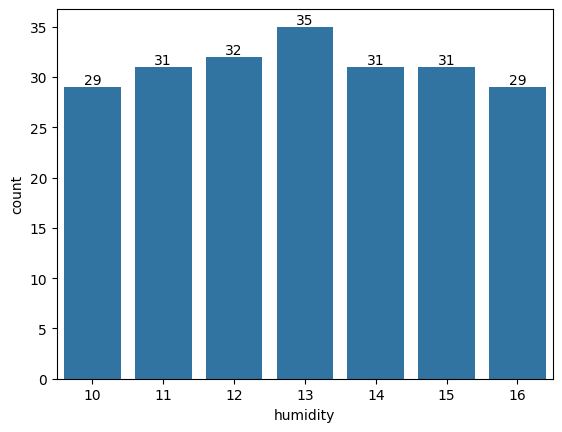

In [3]:
ax = sns.countplot(x='humidity', data=data)
ax.bar_label(ax.containers[0]);

<Axes: xlabel='humidity', ylabel='22'>

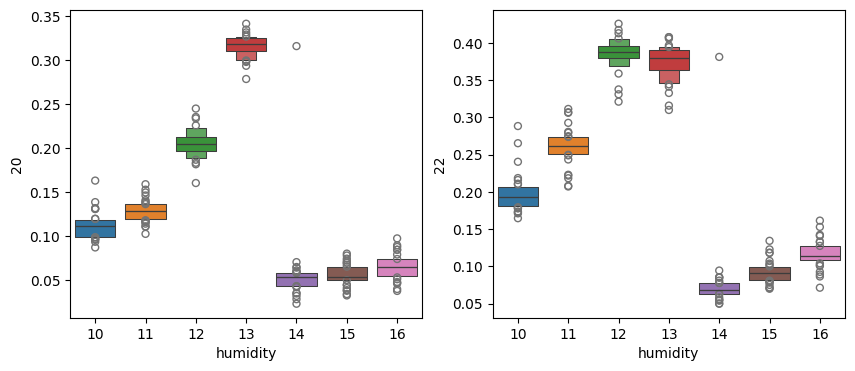

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxenplot(data=data, x='humidity', y='20', hue='humidity')
plt.subplot(1,2,2)
sns.boxenplot(data=data, x='humidity', y='22', hue='humidity')

<Axes: xlabel='22', ylabel='Density'>

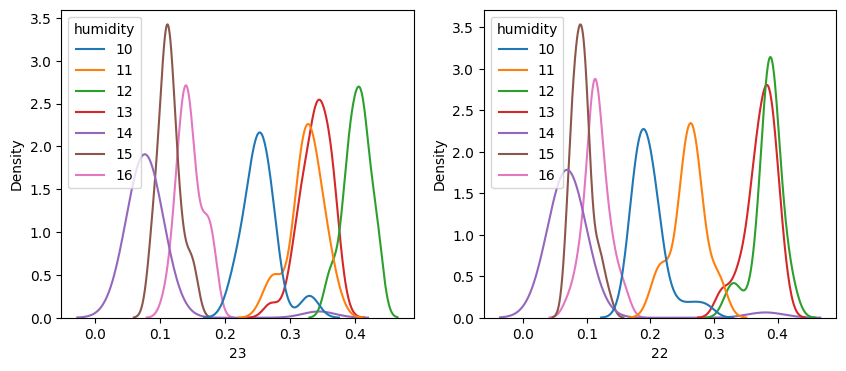

In [6]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.kdeplot(data=data, hue='humidity', x='23')
plt.subplot(1,2,2)
sns.kdeplot(data=data, hue='humidity', x='22')

<Axes: xlabel='22', ylabel='23'>

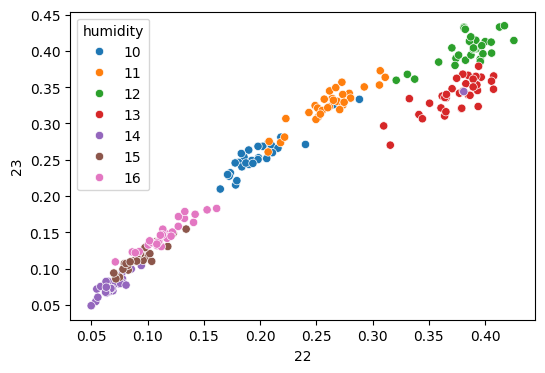

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data, x='22', y='23', hue='humidity')

- Podemos observar separabilidad entre las clases a partir de los histogramas ($X$).
  - Sin embargo puede ser convienente utilizar técnicas de reducción de dimensionalidad para visualizar la separación de clases.

Vea: https://github.com/topics/dimensionality-reduction?l=jupyter+notebook

### Pasos a seguir en un proyecto de Machine Learning (ML)

Un proyecto de ML exitoso no se limita a entrenar un modelo con una red neuronal. Requiere una planificación y ejecución cuidadosa en cada etapa para garantizar resultados confiables y adaptables a la realidad del negocio.

**1. Definición del objetivo:**

* Plantear un problema claro y conciso que se quiera resolver a través de ML.
* Establecer los objetivos específicos del proyecto, las métricas de éxito y el impacto esperado en el negocio.
* Considerar las limitaciones de tiempo, recursos y datos disponibles.

**2. Recopilación y preparación de datos:**

* Identificar las fuentes de datos relevantes, tanto internas como externas.
* **Asegurar la calidad de los datos, verificando su limpieza, completitud y consistencia.
* Preparar los datos para el entrenamiento del modelo, incluyendo limpieza, transformación y normalización.
* Dividir los datos en conjuntos de entrenamiento, validación y prueba para una evaluación precisa del modelo.

**3. Elección del modelo:**

* Seleccionar el algoritmo de ML adecuado para la naturaleza del problema y el tipo de datos disponibles.
* Considerar diferentes tipos de modelos como regresión, clasificación, clustering o redes neuronales.
* Ajustar los hiperparámetros del modelo para optimizar su rendimiento.

**4. Entrenamiento del modelo:**

* Entrenar el modelo con el conjunto de entrenamiento y evaluar su rendimiento en el conjunto de validación.
* Ajustar el modelo y los hiperparámetros para mejorar su precisión y generalización.
* Utilizar técnicas como la validación cruzada para evitar el sobreajuste del modelo.

**5. Evaluación del modelo:**

* Evaluar el rendimiento del modelo final en el conjunto de prueba.
* Analizar las métricas de evaluación como la precisión, la sensibilidad y la especificidad.
* Identificar posibles sesgos o errores en el modelo y tomar medidas correctivas.

**6. Implementación y monitoreo:**

* Implementar el modelo en producción para su uso real en el negocio.
* Monitorizar el rendimiento del modelo en producción y realizar ajustes periódicos según sea necesario.
* Garantizar la seguridad y la ética en el uso del modelo.

**7. Documentación y comunicación:**

* Documentar el proceso completo del proyecto, incluyendo los objetivos, los datos, el modelo y la evaluación.
* Comunicar los resultados del proyecto a las partes interesadas de manera clara y concisa.
* Compartir las lecciones aprendidas y las mejores prácticas para futuros proyectos de ML.

Cada proyecto de ML es único y puede requerir adaptaciones a estos pasos generales. Es importante ser flexible y adaptable a medida que se avanza en el proyecto, y siempre tener en cuenta el objetivo final de resolver un problema real del negocio.

### Ejemplo: Detección de humedad en granos de arroz usando modelos ensemble

**Árboles de Decisión:**

Un **árbol de decisión** es un modelo de aprendizaje automático que se utiliza tanto para clasificación como para regresión. Se caracteriza por una estructura jerárquica similar a un árbol, donde cada nodo interno representa una pregunta o decisión, y las ramas que emanan de cada nodo representan los posibles resultados de esa pregunta. Las hojas del árbol representan las clases finales en el caso de la clasificación, o valores específicos en el caso de la regresión.

**Funcionamiento:**

1. El árbol se entrena con un conjunto de datos que contiene ejemplos de las clases a clasificar o los valores a predecir.
2. Durante el entrenamiento, el algoritmo selecciona las preguntas o características más relevantes para dividir los datos en subconjuntos más homogéneos.
3. Este proceso de división se repite de forma recursiva hasta que se alcanza un criterio de parada, como por ejemplo, un tamaño mínimo de los subconjuntos o una pureza máxima de las clases.
4. Al final del proceso, se obtiene un árbol con una estructura que refleja las relaciones entre las características y las clases o valores objetivo.

**Ventajas:**

* Fácil de interpretar y visualizar.
* Robusto a la presencia de outliers.
* Capaz de manejar variables categóricas y numéricas.

**Desventajas:**

* Puede sufrir de sobreajuste si no se poda correctamente.
* No es tan eficiente como otros algoritmos para conjuntos de datos grandes.

**Random Forest:**

**Random Forest** es un algoritmo de aprendizaje automático que se basa en la idea de combinar múltiples árboles de decisión para obtener un modelo más robusto y preciso.

**Funcionamiento:**

1. Se genera un conjunto de árboles de decisión de forma aleatoria, utilizando diferentes subconjuntos de datos y características.
2. Cada árbol individual realiza una predicción para cada instancia de un nuevo conjunto de datos.
3. La predicción final se obtiene por mayoría de votos en el caso de la clasificación, o por promedio en el caso de la regresión.

**Ventajas:**

* Mayor precisión que un solo árbol de decisión.
* Menos propenso a sufrir de sobreajuste.
* Capaz de manejar conjuntos de datos grandes.

**Desventajas:**

* Puede ser más complejo de interpretar que un solo árbol de decisión.
* Requiere de mayor potencia computacional para entrenar.

**En resumen:**

* Los **árboles de decisión** son modelos simples y fáciles de interpretar, pero pueden ser menos precisos que otros algoritmos.
* **Random Forest** es un algoritmo más robusto y preciso que los árboles de decisión individuales, pero puede ser más complejo de interpretar.

### Pasos

**1. Definición del objetivo:**

  - Detectar humedad en granos de arroz a partir de fotografías obtenidas a partir de la camara de un teléfono celular.

**2. Recopilación y preparación de datos:**

  - Describe tu conjunto de datos y cómo lo obtuviste.
  - Detalla el proceso para procesar el conjunto de datos a modelar.
  - Explora (Visualiza) tu conjunto de datos.**
    - Utiliza PCA, t-SNE (si fuese útil).

  - Para nuestro ejemplo:
    - De dónde provienen los datos (fotografías de los granos).
    - Qué tipo de datos son:
      - Entrada: numéricos (histogramas)
      - Salidad: numérico (humedad $ \in \{10,11, \dots, 16 \}). Podemos considerar como categóricos para nuestro problema de clasificación.
    - Qué características específicas tiene el conjunto de datos (número de variables, tamaño, etc.).
      - **Vea la sección dimensión del dataset.**
    - Cómo preparaste los datos para el análisis **(vea la sección de como construimos nuestro histograma)**.

  - Visualización de datos.

**3. Elección del modelo:**

- Desarrollar dos tipos de modelos predictivos:
    - **Clasificadores:** Predicen niveles discretos de humedad dentro del rango $y \in \{10, 11, ..., 16\}$.
    - **Regresores:** Predicen niveles continuos de humedad, redondeados al entero más cercano (`por ejemplo, 8.9 se redondea a 10, 16.8 se redondea a 16`).
- Implementar ajustes apropiados para la salida $\hat y$ del regresor:
    - Si $\hat y < 10$, establecer $\hat y = 10$.
    - Si $\hat y > 16$, establecer $\hat y = 16$.

**Selección del Algoritmo de Aprendizaje Automático:**

- Explore algoritmos de ML para cada caso
    - **Clasificadores:**
        - Bosque Aleatorio (Random Forest)
        - Gradient boosting
    - **Regresores:**
        - Bosque Aleatorio (Random Forest)
        - Gradient boosting
- Note que los modelos ensemble anteriores pueden ser usados tanto para clasificación como para regresión.

**4. Entrenamiento y (5.) evaluación del modelo:**

- **Divida los datos**: Divida el conjunto de datos en conjuntos de entrenamiento, validación (ajuste de hiperparámetros) y prueba para una evaluación imparcial.
- **Ajuste de Hiperparámetros**: Para cada algoritmo, explore sistemáticamente combinaciones de hiperparámetros utilizando técnicas como búsqueda en cuadrícula, búsqueda aleatoria u optimización Bayesiana para encontrar la mejor configuración para su conjunto de datos.
- **Entrene los modelos**: Emplee validación cruzada (por ejemplo, k-fold, k-fold estratificado) para tener en cuenta la variabilidad de los datos y evaluar la generalización.
- **Visualice y analice el rendimiento del modelo**: Utilice gráficos de diagnóstico (por ejemplo, matrices de confusión para clasificadores, gráficos de residuos para regresores) y métricas (por ejemplo, precisión, precisión, recuperación, puntuación F1, RMSE, MAE) para comprender el comportamiento del modelo e identificar áreas de mejora.

- **Revise:** Determination of Moisture in Rice Grains Based on Visible Spectrum Analysis
  - https://www.mdpi.com/2073-4395/12/12/3021
  - https://www.featureranking.com/tutorials/machine-learning-tutorials/

### Crear datos de entrada $X$ y salida $y$

In [5]:
# Seleccionar entrada X y las etiquetas de salida y
X = data.iloc[:,:-1]  # todas las columnas menos la etiquieta y
y = data['humidity']  # etiqueta y: humedad

### Primera prueba

- Entrenamos y evaluamos con todos los datos.

- Los pasos generales a seguir en `skelearn` para construir modelos de ML, son los siguientes:

  - Importar el modelo:
```Python
from sklearn.ensemble import RandomForestClassifier
```

  - Definir el modelo:
```Python
clf=RandomForestClassifier()
```

  - Ajustar (entrenar) el modelo:
```Python
clf.fit(X, y)
```

  - Realizar predicciones:
```Python
y_pred=clf.predict(X)
```

  - Evaluar el modelo:
```Python
print(classification_report(y, y_pred))
confusion_matrix(y, y_pred)
```

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

# Create a Random Forest Classifier with default parameters
clf=RandomForestClassifier()

# Train the model using the whole dataset and default parameters
clf.fit(X, y)

y_pred=clf.predict(X)

print(classification_report(y, y_pred))

confusion_matrix(y, y_pred)

              precision    recall  f1-score   support

          10       1.00      1.00      1.00        29
          11       1.00      1.00      1.00        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       1.00      1.00      1.00        31
          16       1.00      1.00      1.00        29

    accuracy                           1.00       218
   macro avg       1.00      1.00      1.00       218
weighted avg       1.00      1.00      1.00       218



array([[29,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0],
       [ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0, 31,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0, 29]])

### Matriz de confusión

Una **matriz de confusión** es una herramienta fundamental en el aprendizaje automático para evaluar el rendimiento de un modelo de **clasificación**. Esta matriz resume las **predicciones** del modelo en comparación con las **etiquetas reales** de los datos, permitiendo visualizar y comprender los errores del modelo de forma clara y concisa.

**Estructura de la matriz:**

- **Filas**: Representan las **clases reales** del conjunto de datos.
- **Columnas**: Representan las **clases predichas** por el modelo.

Cada celda de la matriz contiene el número de instancias que fueron clasificadas en una clase específica por el modelo, en comparación con su clase real.

**Ejemplo:**

Supongamos que tenemos un problema de clasificación binaria con dos clases: **Perro** y **Gato**. La matriz de confusión para un modelo con 100 instancias podría verse así:

```
             | Perro (Predicho) | Gato (Predicho) | Total
------- | -------- | -------- | --------
Perro (Real) | 80      | 20      | 100
Gato (Real) | 10      | 90      | 100
Total       | 90      | 110     | 200
```

**Interpretación de la matriz:**

- **Casilla diagonal principal:** Contiene las **predicciones correctas**. En este caso, 80 perros fueron correctamente clasificados como perros y 90 gatos fueron correctamente clasificados como gatos.
- **Casillas fuera de la diagonal principal:** Contienen los **errores del modelo**. En este caso, 20 perros fueron clasificados erróneamente como gatos y 10 gatos fueron clasificados erróneamente como perros.

**Beneficios de la matriz de confusión:**

- Visualiza el rendimiento del modelo de forma clara y concisa.
- Permite identificar los errores del modelo y las áreas donde se puede mejorar.
- Ayuda a seleccionar el mejor modelo entre diferentes opciones.

### Métricas de Evaluación en Clasificación: Precisión, Recall, F1-Score

La evaluación del rendimiento de un modelo de clasificación es crucial para entender su eficacia y limitaciones. Existen diversas métricas utilizadas para este fin, entre las que destacan:

**1. Precisión (Precision):**

- Proporciona la proporción de **clasificaciones positivas que fueron correctas**. Se calcula dividiendo el número de **verdaderos positivos (TP)** entre el número total de predicciones positivas (TP + FP).

$$
Precisión = TP / (TP + FP)
$$

- Un valor alto de precisión indica que el modelo es bueno para no etiquetar incorrectamente como positivas las instancias negativas.
- Sin embargo, la precisión puede ser engañosa en problemas desbalanceados, donde hay clases minoritarias.

**2. Recall (Sensibilidad):**

- Mide la proporción de **instancias realmente positivas que fueron correctamente clasificadas**. Se calcula dividiendo el número de **verdaderos positivos (TP)** entre el número total de instancias positivas reales (TP + FN).

$$
Recall = TP / (TP + FN)
$$

- Un valor alto de recall indica que el modelo es bueno para identificar correctamente las instancias positivas.
- Similar a la precisión, el recall puede ser engañoso en problemas desbalanceados, donde las clases minoritarias pueden tener un recall bajo a pesar de que el modelo las clasifique bien.

**3. F1-Score:**

- La **F1-Score** es una métrica equilibrada que combina la precisión y el recall en una sola medida. Se calcula como la media armónica ponderada de la precisión y el recall.

$$
F1 = 2 * (Precision * Recall) / (Precision + Recall)
$$

- Un valor alto de F1-Score indica que el modelo tiene un buen equilibrio entre la precisión y el recall.
- La F1-Score es una métrica particularmente útil en problemas desbalanceados, ya que tiene en cuenta la importancia de clasificar correctamente tanto las clases mayoritarias como las minoritarias.

**Resumen:**

* La **Precisión** se preocupa por las predicciones positivas que son correctas.
* El **Recall** se preocupa por las instancias positivas que se identifican correctamente.
* La **F1-Score** combina ambos aspectos en una sola métrica equilibrada.

La elección de la métrica más adecuada depende del contexto específico del problema. En general, si las clases están relativamente equilibradas y ambos tipos de error (clasificar mal los positivos y clasificar mal los negativos) son igualmente costosos, entonces la F1-Score puede ser una buena opción. Si un tipo de error tiene un costo mayor que el otro, entonces podría ser más relevante utilizar la precisión o el recall dependiendo del tipo de error que se quiera minimizar.

### Resultado

En nuestro ejemplo un F1-Score de 1 significa que el modelo clasifica perfectamente todas las instancias, sin cometer ningún error.

Esto implica que:

La precisión del modelo es del 100%, lo que significa que todas las instancias predichas como positivas realmente lo son.
El recall del modelo también es del 100%, lo que significa que todas las instancias positivas reales fueron correctamente clasificadas.

**¿Se ha generalizado bien?**

Un F1-Score perfecto en el conjunto de entrenamiento no garantiza que el modelo se generalice bien a nuevos datos que no ha visto antes. Es crucial evaluar el modelo en un conjunto de test independiente para asegurar su rendimiento en situaciones reales.

### Train test split

Un **train test split** es una técnica fundamental en el aprendizaje automático para dividir un conjunto de datos en dos subconjuntos:

* **Conjunto de entrenamiento:** Se utiliza para entrenar el modelo. Este conjunto debe ser lo suficientemente grande como para que el modelo aprenda las características relevantes de los datos, pero no tan grande como para que el entrenamiento sea demasiado lento.
* **Conjunto de prueba:** Se utiliza para evaluar el rendimiento del modelo después de que ha sido entrenado. Este conjunto debe ser independiente del conjunto de entrenamiento para que la evaluación sea imparcial.

La división del conjunto de datos en dos partes permite:
  - Evitar el **sobreajuste**, que es un problema que ocurre cuando el modelo aprende demasiado las características del conjunto de entrenamiento y no se generaliza bien a nuevos datos.
  -  Evaluar el rendimiento del modelo de forma imparcial: utilizar un conjunto de prueba independiente, la evaluación del rendimiento del modelo será más precisa y confiable.
  - Seleccionar el mejor modelo: Si se está entrenando y evaluando multiple modelos, es necesario utilizar un conjunto de prueba independiente para comparar el rendimiento de los diferentes modelos y seleccionar el mejor.
  - Optimizar los hiperparámetros del modelo: Los hiperparámetros son los parámetros que controlan el proceso de entrenamiento del modelo. Se pueden utilizar diferentes técnicas para optimizar los hiperparámetros del modelo, como la búsqueda en cuadrícula o la búsqueda aleatoria.

**Existen diferentes técnicas para realizar un train test split:**

* **División aleatoria:** Es la técnica más simple, donde se dividen los datos aleatoriamente en dos conjuntos.
* **División estratificada:** Se utiliza cuando las clases en el conjunto de datos están desbalanceadas. Esta técnica divide los datos en dos conjuntos manteniendo la misma proporción de clases en ambos.
* **Validación cruzada:** Es una técnica más avanzada que divide los datos en múltiples conjuntos y entrena y evalúa el modelo en cada uno de ellos.

- La línea de código:

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
```

divide un conjunto de datos en dos conjuntos, un conjunto de **entrenamiento** y un conjunto de **prueba**, de forma **estratificada**. Esto significa que se asegura que la distribución de clases en ambos conjuntos de prueba y entrenamiento sea similar a la distribución de clases en el conjunto de datos original.


- **X**: Representa la matriz de características del conjunto de datos. Contiene información numérica o categórica que describe las instancias (filas).
- **y**: Representa la matriz de etiquetas del conjunto de datos. Contiene la variable objetivo o predicción para cada instancia.
- **X_train**: Matriz de características del conjunto de entrenamiento.
- **X_test**: Matriz de características del conjunto de prueba.
- **y_train**: Matriz de etiquetas del conjunto de entrenamiento.
- **y_test**: Matriz de etiquetas del conjunto de prueba.
- **test_size=0.3**, 70% datos de entrenamiento, 30% datos de prueba.
- **stratify=y**: Este es el argumento clave que habilita la **estratificación**. Indica que la división del conjunto de datos debe mantener la misma distribución de clases que el conjunto de datos original. Esto es particularmente importante cuando se trabaja con **conjuntos de datos desbalanceados**, donde hay una clase dominante y varias clases minoritarias.

- El argumento `stratify` solo funciona con variables objetivo categóricas (clases).

              precision    recall  f1-score   support

          10       1.00      0.86      0.92         7
          11       0.89      1.00      0.94         8
          12       1.00      0.88      0.93         8
          13       1.00      1.00      1.00         9
          14       1.00      0.75      0.86         8
          15       0.80      1.00      0.89         8
          16       0.88      1.00      0.93         7

    accuracy                           0.93        55
   macro avg       0.94      0.93      0.93        55
weighted avg       0.94      0.93      0.93        55



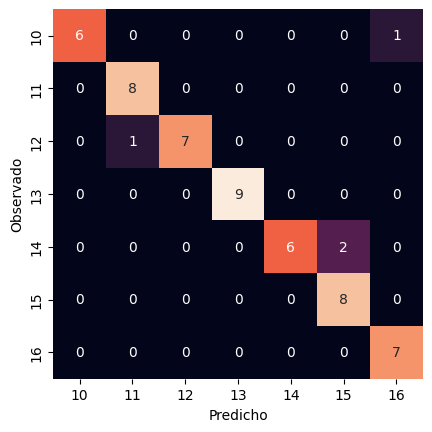

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Train the model using the whole dataset and default parameters
clf.fit(X_train, y_train)

# Evaluamos en el conjunto de prueba X_test
y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred))  # Predicho vs etiquetas de prueba

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred),
                         index=np.unique(y), columns=np.unique(y)),
            annot=True, square=True, cbar=False)
plt.xlabel("Predicho")
plt.ylabel("Observado");

- **Discuta la matriz de confusión** y las métricas de evaluación del modelo.

- La clasificación no es perfecta en este caso para nuestro conjunto de prueba. Este es un resultado más realista de lo que observaremos en la implementación del modelo.

- Vamos a realizar un ejercicio de validación cruzada en conjunto con la optimización de hiper-parámetros del modelo RF.

### Cross validation

La **validación cruzada con ajuste de hiperparámetros** es una técnica avanzada en el aprendizaje automático que combina dos estrategias para optimizar el rendimiento de un modelo:

**1. Validación cruzada (CV):**

La **validación cruzada** divide el conjunto de datos en múltiples subconjuntos (**folds**) y entrena y evalúa el modelo en cada uno de ellos. Esto permite obtener una estimación más precisa del rendimiento del modelo en comparación con la evaluación en un solo conjunto de prueba.

![CV](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/1920px-K-fold_cross_validation_EN.svg.png)

**2. Ajuste de hiperparámetros (HPO):**

Los **hiperparámetros** son los parámetros que controlan el proceso de entrenamiento del modelo, como la tasa de aprendizaje o el número de iteraciones. El **ajuste de hiperparámetros** busca encontrar la mejor configuración de estos parámetros para optimizar el rendimiento del modelo.

### Búsqueda aleatoria y búsqueda en cuadrícula para ajuste de hiperparámetros:

**Búsqueda aleatoria:**

* **Procedimiento:**
    * Muestrea aleatoriamente un conjunto de configuraciones de hiperparámetros de un espacio de búsqueda predefinido.
    * Entrena el modelo con cada configuración de hiperparámetros.
    * Selecciona la configuración que produce el mejor rendimiento en el conjunto de validación.
* **Ventajas:**
    * Es más eficiente que la búsqueda en cuadrícula, especialmente cuando hay muchos hiperparámetros.
    * Puede explorar un espacio de búsqueda más amplio y encontrar configuraciones de hiperparámetros que la búsqueda en cuadrícula podría pasar por alto.
* **Desventajas:**
    * No es tan precisa como la búsqueda en cuadrícula.
    * Puede ser difícil encontrar la mejor distribución de probabilidad para el muestreo aleatorio.

**Búsqueda en cuadrícula:**

* **Procedimiento:**
    * Define un conjunto discreto de valores para cada hiperparámetro.
    * Entrena el modelo con todas las combinaciones posibles de valores de hiperparámetros.
    * Selecciona la configuración que produce el mejor rendimiento en el conjunto de validación.
* **Ventajas:**
    * Es más precisa que la búsqueda aleatoria.
    * Es más fácil de implementar.
* **Desventajas:**
    * Puede ser computacionalmente costosa, especialmente cuando hay muchos hiperparámetros.
    * No explora el espacio de búsqueda tan bien como la búsqueda aleatoria.

**Resumen:**

* La búsqueda aleatoria es una buena opción cuando hay muchos hiperparámetros o cuando se desea explorar un espacio de búsqueda amplio.
* La búsqueda en cuadrícula es una buena opción cuando hay pocos hiperparámetros y se desea obtener la mejor configuración posible.

**Consideraciones adicionales:**

* El tamaño del espacio de búsqueda.
* El tiempo y los recursos disponibles.
* El tipo de modelo de aprendizaje automático.
* La complejidad del problema.

**Recomendación:**

Se recomienda probar ambas técnicas y comparar sus resultados para elegir la mejor opción para cada caso particular.


![](https://raw.githubusercontent.com/marsgr6/r-scripts/master/imgs/0_yDmmJmvRowl0cSN8.png)


**Combinación de ambas técnicas (CV y HPO):**

La **validación cruzada con ajuste de hiperparámetros** combina ambas estrategias para encontrar la mejor configuración de hiperparámetros para un modelo. El proceso se realiza de la siguiente manera:

1. Se divide el conjunto de datos en **folds**.
2. Para cada fold:
    * Se entrena el modelo con diferentes configuraciones de hiperparámetros.
    * Se evalúa el rendimiento del modelo en el conjunto de validación correspondiente al fold.
3. Se selecciona la configuración de hiperparámetros que obtuvo el mejor rendimiento promedio en todos los folds.
4. Se entrena el modelo final con la configuración de hiperparámetros seleccionada y se evalúa en un conjunto de prueba independiente.

**Ventajas de la validación cruzada con ajuste de hiperparámetros:**

- Reduce el riesgo de **sobreajuste**, que es un problema que ocurre cuando el modelo se ajusta demasiado al conjunto de entrenamiento y no se generaliza bien a nuevos datos.
- Permite encontrar la mejor configuración de hiperparámetros para un modelo, lo que mejora su rendimiento.
- Obtiene una estimación más precisa del rendimiento del modelo en nuevos datos.

### Número de folds

El número de folds a usar en la validación cruzada (cross validation) depende de varios factores, incluyendo:

**1. Tamaño del conjunto de datos:**

* Si tiene un **conjunto de datos pequeño** (menos de 1000 ejemplos), se recomienda usar un número menor de folds (por ejemplo, 5 o 10).
* Si tiene un **conjunto de datos grande** (más de 1000 ejemplos), puede usar un número mayor de folds (por ejemplo, 10, 20 o 30).

**2. Varianza del modelo:**

* Si su modelo tiene una **alta varianza** (es decir, es susceptible a cambios en el conjunto de entrenamiento), se recomienda usar un número mayor de folds para obtener una estimación más precisa del error.
* Si su modelo tiene una **baja varianza** (es decir, es robusto a cambios en el conjunto de entrenamiento), un número menor de folds puede ser suficiente.

**3. Tiempo de computación:**

* La validación cruzada con un número mayor de folds toma más tiempo de computación.
* Si tiene recursos computacionales limitados, puede usar un número menor de folds.

**En general, se recomienda usar un número de folds entre 5 y 30.**

**Algunos valores comunes son:**

* **5 folds:** Es un buen punto de partida para la mayoría de los conjuntos de datos.
* **10 folds:** Es un buen equilibrio entre precisión y tiempo de computación.
* **20 folds:** Se puede usar para obtener una estimación más precisa del error, especialmente con conjuntos de datos grandes.

**Es importante tener en cuenta que no existe un número "óptimo" de folds que funcione para todos los casos.**

**La mejor manera de determinar el número de folds a usar es experimentar con diferentes valores y observar cómo afecta el rendimiento del modelo.**

**Aquí hay algunos consejos adicionales para elegir el número de folds:**

* Si tiene un conjunto de datos pequeño, use un número menor de folds.
* Si tiene un conjunto de datos grande, use un número mayor de folds.
* Si su modelo tiene una alta varianza, use un número mayor de folds.
* Si su modelo tiene una baja varianza, un número menor de folds puede ser suficiente.
* Si tiene recursos computacionales limitados, use un número menor de folds.
* Experimente con diferentes valores de folds y observe cómo afecta el rendimiento del modelo.

**Recursos adicionales:**

- Ver: https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-4-cross-validation-and-hyperparameter-tuning/
- Validación cruzada: [https://scikit-learn.org/stable/modules/cross_validation.html](https://scikit-learn.org/stable/modules/cross_validation.html)

In [4]:
# We will perform a hyperparamter optimization
# Using KFold cross validation
from sklearn.model_selection import KFold

# This is 10-fold cross validation
cv_method = KFold(n_splits=10)  # change n_splits for your dataset

### Hiper-parámetros de un modelo RF

En Random Forest, los hiperparámetros que se pueden optimizar son:

**1. Número de árboles (n_estimators):** Este es el número de árboles que se construirán en el bosque. Un valor mayor generalmente conduce a una mejor precisión, pero también aumenta el tiempo de entrenamiento y la complejidad del modelo.

**2. Profundidad máxima de los árboles (max_depth):** Este es el número máximo de niveles que puede tener un árbol. Un valor mayor permite que los árboles aprendan patrones más complejos, pero también aumenta el riesgo de sobreajuste.

**3. Número mínimo de muestras por hoja (min_samples_leaf):** Este es el número mínimo de muestras que deben estar en una hoja para que se considere una división. Un valor mayor reduce la complejidad del modelo, pero también puede aumentar el error.

**4. Número mínimo de muestras para dividir un nodo (min_samples_split):** Este es el número mínimo de muestras que deben estar en un nodo para que se considere una división. Un valor mayor reduce la complejidad del modelo, pero también puede aumentar el error.

**5. Criterio de división (criterion):** Este es el criterio que se utiliza para dividir los nodos. Las opciones comunes son "gini" (índice de Gini) y "entropy" (entropía).

**6. Función de impureza (impurity):** Esta es la función que se utiliza para medir la impureza de un nodo. Las opciones comunes son "gini" (índice de Gini) y "entropy" (entropía).

**7. Máximo número de características por árbol (max_features):** Este es el número máximo de características que se consideran para cada división en un árbol. Un valor menor reduce la complejidad del modelo, pero también puede aumentar el error.

**8. Método de muestreo (bootstrap):** Este es el método que se utiliza para seleccionar las muestras para cada árbol. Las opciones comunes son "True" (bootstrap) y "False" (sin bootstrap).

**9. Peso de las clases (class_weight):** Este es el peso que se asigna a cada clase durante el entrenamiento. Se puede usar para ajustar el modelo para que funcione mejor con clases minoritarias.

**10. Tasa de aprendizaje (learning_rate):** Esta es la tasa a la que se actualiza el modelo durante el entrenamiento. Un valor mayor puede conducir a una convergencia más rápida, pero también puede aumentar el error.

En general, no existe una configuración única de hiperparámetros que funcione mejor para todos los conjuntos de datos. Es importante probar diferentes configuraciones para encontrar la que mejor se adapte a su problema específico.

In [7]:
# These are the hyper-parameter values to test
params_RF = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [9, 12],
    'max_leaf_nodes': [9, 12],
    'criterion': ["gini", "entropy"]
}

In [8]:
from sklearn.model_selection import GridSearchCV

gs_RF = GridSearchCV(estimator=RandomForestClassifier(),  # Define estimator
                     param_grid=params_RF,  # select hyperparameters according your model (estimator)
                     cv=cv_method,  # keep it (can change for your problem)
                     verbose=1,  # verbose: the higher, the more messages
                     scoring='accuracy',
                     return_train_score=True)

In [9]:
%%time
gs_RF.fit(X, y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
CPU times: user 6min 12s, sys: 1.33 s, total: 6min 13s
Wall time: 6min 27s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [9, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [9, 12],
                         'n_estimators': [25, 50, 100, 150, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

- Note que la evaluación del resultado para el cross-validation en la búsqueda de rejilla (grid search) la realizamos para el **accuracy promedio** sobre los conjuntos de prueba `mean_test_score`.

In [10]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['accuracy'] = gs_RF.cv_results_['mean_test_score']
results_RF.max_features = results_RF.max_features.astype('str')
results_RF.head()

,criterion,max_depth,max_features,max_leaf_nodes,n_estimators,accuracy
0,gini,9,sqrt,9,25,0.723377
1,gini,9,sqrt,9,50,0.750433
2,gini,9,sqrt,9,100,0.755844
3,gini,9,sqrt,9,150,0.737229
4,gini,9,sqrt,9,200,0.755411


<ipython-input-57-94125394a663>:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.relplot(


{'criterion': 'gini',
 'max_depth': 12,
 'max_features': None,
 'max_leaf_nodes': 12,
 'n_estimators': 100}

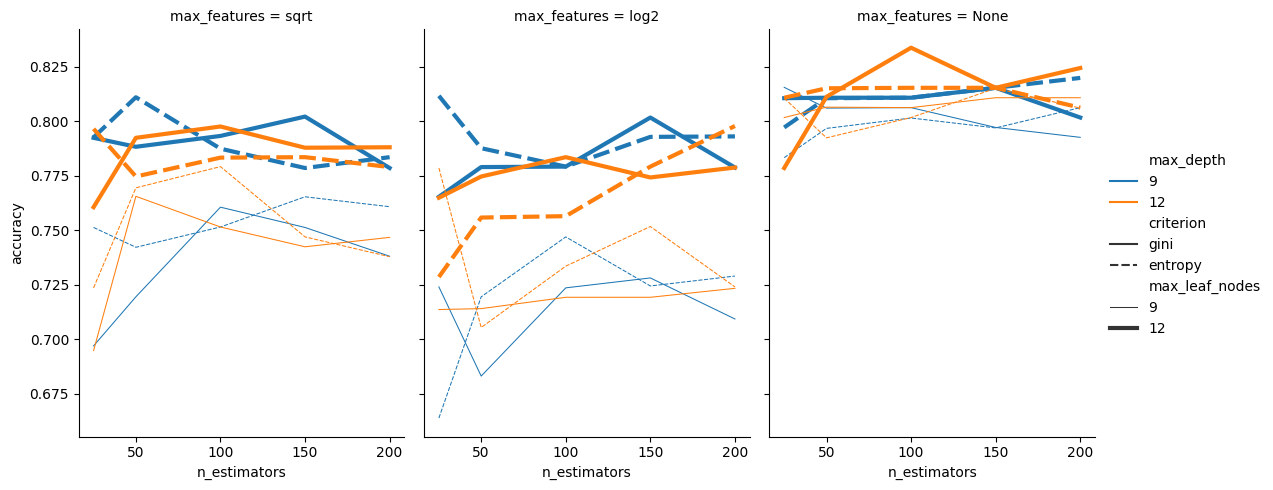

In [ ]:
# Plot the lines on facets
sns.relplot(
    data=results_RF,
    x="n_estimators", y="accuracy",
    hue="max_depth", size="max_leaf_nodes", col="max_features",
    style="criterion",
    kind="line", palette=sns.color_palette("tab10"),
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)
gs_RF.best_params_

Scores: [0.45454545 0.90909091 0.86363636 1.         0.95454545 0.90909091
 0.68181818 1.         0.66666667 0.71428571]


RandomForestClassifier(max_depth=9, max_features=None, max_leaf_nodes=12,
                       n_estimators=50)

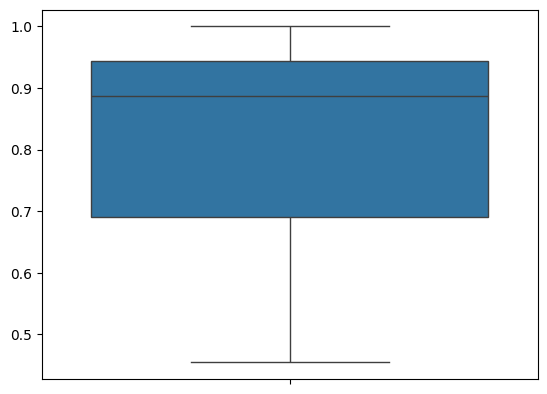

In [12]:
# This is the final model you want to deploy
from sklearn.model_selection import cross_val_score

# Use the best hyper-parameters
# best_RF = RandomForestClassifier(**gs_RF.best_params_)
best_RF = gs_RF.best_estimator_

# Test how the model will perform if deployed
scores_class = cross_val_score(best_RF, X, y, cv=cv_method)
print("Scores:", scores_class)
sns.boxplot(y=scores_class)
best_RF

### Importancia de características

El "feature importance" en Random Forest es una medida que indica cuán significativas o importantes son las características (features) de entrada para la predicción realizada por el modelo. En Random Forest, este valor se calcula al observar cuánto se reduce la precisión de la predicción cuando se omite una característica específica del conjunto de datos.

En términos generales, el "feature importance" se calcula utilizando la ganancia de información o la reducción de la impureza (como el índice Gini) que proporciona cada característica al árbol de decisión durante la construcción del Random Forest. Las características que causan una mayor reducción en la impureza se consideran más importantes, ya que contribuyen más a la capacidad predictiva del modelo.

Es importante tener en cuenta que el "feature importance" en Random Forest no proporciona información sobre la dirección o la naturaleza de la relación entre las características y la variable objetivo. Simplemente indica qué características son más influyentes en la predicción general del modelo. Esta información es útil para comprender mejor el problema y puede ayudar en la selección de características o en la interpretación de los resultados del modelo.

Son estas variables las que deberían mostrar mayor separabilidad, en este caso los bines centrales 23, 34, 22.

<ipython-input-13-c8556996e932>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


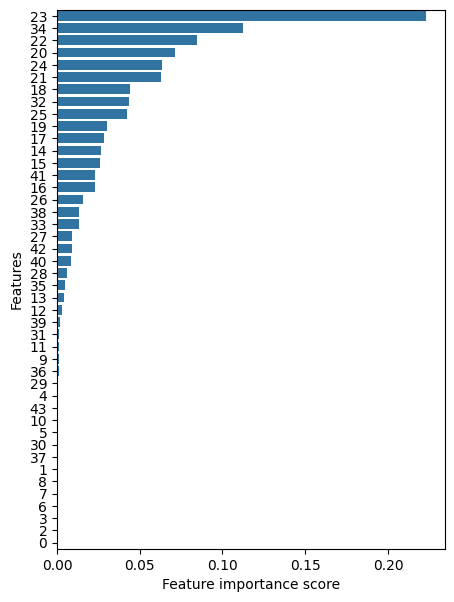

In [13]:
best_RF.fit(X, y)

feature_scores = pd.Series(best_RF.feature_importances_, index=X.columns).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(5, 7))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Problema de regresión: detección de humedad

Vamos a tratar el problema de detección de humedad como un problema de regresión.

En este caso el modelo va a devolver un valor predicho $\hat y$ continuo.

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#Create a Gaussian Classifier with default parameters
reg = RandomForestRegressor()

#Train the model using the whole dataset and default parameters
reg.fit(X, y)

y_pred = reg.predict(X)

mean_squared_error(y, y_pred)

0.017563302752293567

<Axes: xlabel='humidity'>

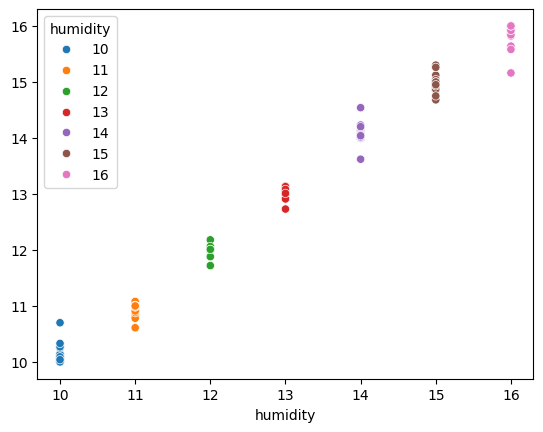

In [15]:
sns.scatterplot(x=y, y=y_pred, hue=y)

- Nuestro modelo RF, parece acotar la salida predicha $\hat y$ dentro de los límites de nuestro problema.

              precision    recall  f1-score   support

          10       1.00      0.97      0.98        29
          11       0.97      1.00      0.98        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      0.97      0.98        31
          15       0.94      1.00      0.97        31
          16       1.00      0.97      0.98        29

    accuracy                           0.99       218
   macro avg       0.99      0.99      0.99       218
weighted avg       0.99      0.99      0.99       218



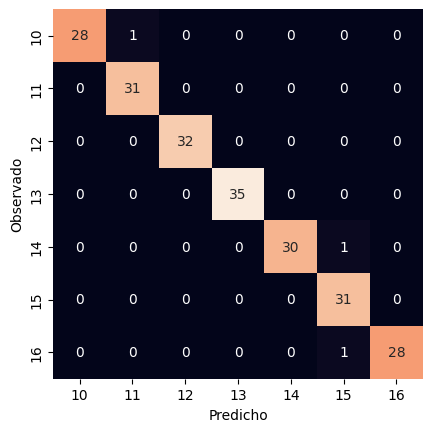

In [16]:
# Round to nearest integer, DON'T FORGET THE BOUNDS OF YOUR PROBLEM
y_pred_r = (np.round(y_pred).astype(int)).astype('str')

print(classification_report(y, y_pred_r))

sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred_r),
                         index=np.unique(y), columns=np.unique(y)),
            annot=True, square=True, cbar=False)
plt.xlabel("Predicho")
plt.ylabel("Observado");

### Optimización de hiper-parámetros

- Para optmizar los hiper-parámetros de nuestro modelo de regresión conservaremos `n_estimators` y `max_features` de nuestro problema de clasificación.
  - Dado que el split ocurre con un criterio diferente para regresión usamos: `'criterion': ['squared_error', 'absolute_error', 'friedman_mse']`.
- Revise: https://stackoverflow.com/questions/55113978/what-is-the-difference-between-freidman-mse-and-mse

- La implementación del `GridSearchCV` de `sklearn` es un proceso de maximización. Para el caso de una métrica de **accuracy** promedio, esto es deseable. En una regresión sin embargo queremos minimizar, `GridSearchCV` maximiza por tanto un mse negativo para un problema de regresión.

In [17]:
%%time
# GS and CV were performed for a regression problem
# You can adapt to classification
y_reg = y.astype('int')

# Choose parametes accordingly
params_RF = {'n_estimators': [25, 50, 100, 150, 200],
             'max_features': ['sqrt', 'log2', None],
             'criterion': ['squared_error', 'absolute_error', 'friedman_mse']}

gs_RF = GridSearchCV(estimator=RandomForestRegressor(),  # change estimator (REGRESSOR), check IA1 models
                     param_grid=params_RF,  # change for your model  (MAY CHANGE FROM CLASSIFIER)
                     cv=cv_method,  # 10 fold cross-validation
                     verbose=1,  # verbose: the higher, the more messages
                     scoring='neg_mean_squared_error',  # MSE (negative*), Maximize -f(MSE)
                     return_train_score=True)

gs_RF.fit(X, y_reg)

Fitting 10 folds for each of 45 candidates, totalling 450 fits
CPU times: user 2min 39s, sys: 476 ms, total: 2min 40s
Wall time: 2min 43s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [25, 50, 100, 150, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

- Recordemos que nuestra búsqueda de rejilla está maximixando un MSE negativo.
  - Nosotros queremos el valor absoluto de este valor.

In [18]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['MSE'] = np.abs(gs_RF.cv_results_['mean_test_score'])
results_RF.max_features = results_RF.max_features.astype('str')

results_RF.head()

,criterion,max_features,n_estimators,MSE
0,squared_error,sqrt,25,0.316278
1,squared_error,sqrt,50,0.345477
2,squared_error,sqrt,100,0.353463
3,squared_error,sqrt,150,0.345251
4,squared_error,sqrt,200,0.348783


<ipython-input-22-fe6bdeb6ba04>:2: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.relplot(


{'criterion': 'absolute_error', 'max_features': 'log2', 'n_estimators': 50}

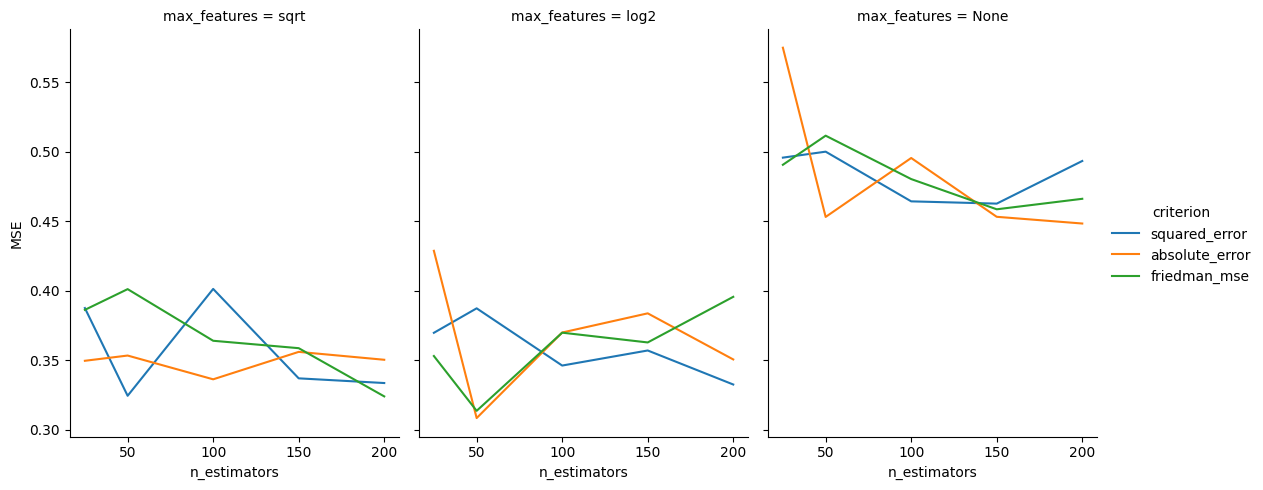

In [22]:
# Plot the lines on facets
sns.relplot(
    data=results_RF,
    x="n_estimators", y="MSE",
    hue="criterion", col="max_features",
    kind="line", palette=sns.color_palette("tab10"),
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)
gs_RF.best_params_

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#Create a Gaussian Classifier
best_RF_reg = RandomForestRegressor(**gs_RF.best_params_)

#Train the model using the whole dataset and default parameters
best_RF_reg.fit(X, y)

y_pred = best_RF_reg.predict(X)

mean_squared_error(y, y_pred)

0.021915596330275202

<Axes: xlabel='humidity'>

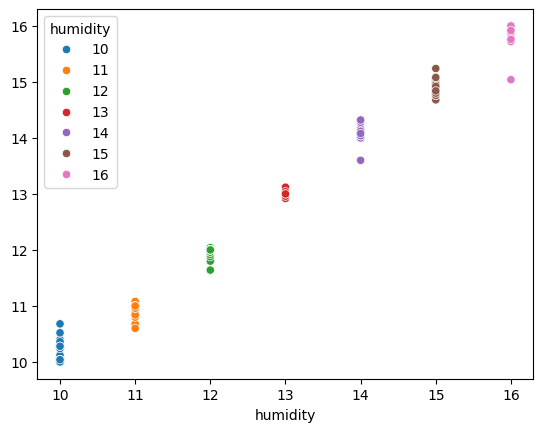

In [20]:
sns.scatterplot(x=y, y=y_pred, hue=y)

- Redondeamos el resultado del regresor al entero más cercano y evaluamos como una clasificación para comparar en igualdad de condiciones en términos de **accuracy**.

              precision    recall  f1-score   support

          10       1.00      0.90      0.95        29
          11       0.91      1.00      0.95        31
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        35
          14       1.00      1.00      1.00        31
          15       0.97      1.00      0.98        31
          16       1.00      0.97      0.98        29

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218

0.981651376146789


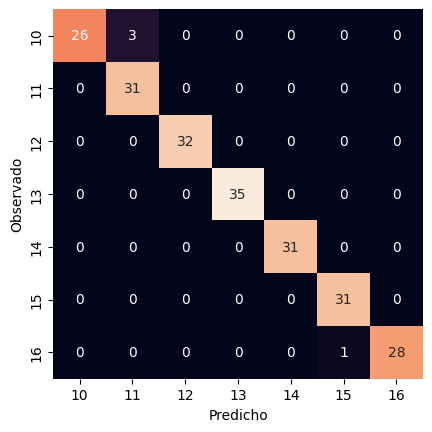

In [22]:
# Regression result to a class
# Round to nearest integer
# Define the upper and lower bound of your problem and enclosed your result within
y_pred_r = (np.round(y_pred).astype(int)).astype('str')

print(classification_report(y, y_pred_r))

print(accuracy_score(y, y_pred_r))

sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred_r),
                         index=np.unique(y), columns=np.unique(y)),
            annot=True, square=True, cbar=False)
plt.xlabel("Predicho")
plt.ylabel("Observado");

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# CV evaluation
kfold = KFold(n_splits=10)
scores_reg = []
for train_index, test_index in kfold.split(X, y):
    # This was my best model
    model = RandomForestRegressor(**gs_RF.best_params_)

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)  # predict label
    # Round to nearest integer to evaluate as classification
    # IMPORTANT: Set lower and upper bounds in 10 and 16 respectively
    y_pred_r = (np.round(y_pred).astype(int)).astype('str')
    # Evaluate rounded regression output as a classification
    scores_reg += [accuracy_score(y_test, y_pred_r)]
scores_reg

[0.18181818181818182,
 0.9090909090909091,
 0.8636363636363636,
 0.8636363636363636,
 0.9545454545454546,
 0.9090909090909091,
 0.5,
 0.9090909090909091,
 0.7619047619047619,
 0.5238095238095238]

In [24]:
models_accuracy = pd.DataFrame({'accuracy': list(scores_class)+list(scores_reg),
                                'model': ['Classification']*10 + ['Regression']*10})
models_accuracy

,accuracy,model
0,0.454545,Classification
1,0.909091,Classification
2,0.863636,Classification
3,1.000000,Classification
4,0.954545,Classification
5,0.909091,Classification
6,0.681818,Classification
7,1.000000,Classification
8,0.666667,Classification
9,0.714286,Classification


- Ajustar un regresor es más difícil que ajustar un clasificador.

,accuracy
model,
Classification,0.815368
Regression,0.737662


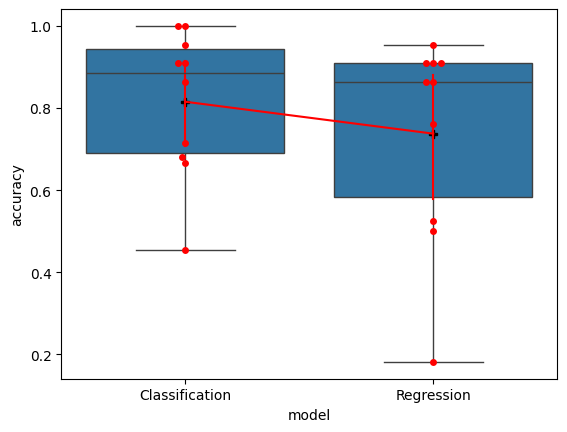

In [25]:
sns.boxplot(models_accuracy, x='model', y="accuracy", order=["Classification", "Regression"])
plt.plot(models_accuracy.groupby('model').mean(), 'Pk')
sns.lineplot(models_accuracy, x='model', y="accuracy", err_style="bars", c="red")
sns.swarmplot(models_accuracy, x='model', y="accuracy", c="red")
models_accuracy.groupby('model').mean()

<Axes: xlabel='model', ylabel='accuracy'>

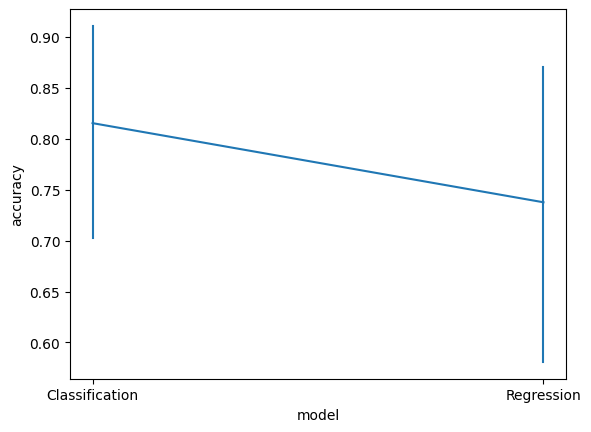

In [26]:
sns.lineplot(models_accuracy, x='model', y="accuracy", err_style="bars")

**ML tutorials from www.featureranking.com**

- [Data Preparation for Predictive Modeling](https://marsgr6.github.io/presentations/Data_Preparation_for_Predictive_Modeling.html#/)
- [SK Part 0: Introduction to Predictive Modeling with Python and Scikit-Learn](https://marsgr6.github.io/presentations/SK_Part_0_Introduction_to_Predictive_Modeling_with_Python_and_Scikit-Learn.html#/)
- [SK Part 1: Basic Modeling](https://marsgr6.github.io/presentations/SK_Part_1_Basic_Modeling.html#/)
- [SK Part 2: Feature Selection and Ranking](https://marsgr6.github.io/presentations/SK_Part_2_Feature_Selection_and_Ranking.html#/)
- [SK Part 3: Model Evaluation](https://marsgr6.github.io/presentations/SK_Part_3_Model_Evaluation.html#/)
- [SK Part 4: Cross-Validation and Hyperparameter Tuning](https://marsgr6.github.io/presentations/SK_Part_4_Cross-Validation_and_Hyperparameter_Tuning.html#/)
- [SK Part 5: Advanced Topics, Pipelines, Statistical Model Comparison, and Model Deployment](https://marsgr6.github.io/presentations/SKPart_5_Advanced_Topics_Pipelines_Statistical_Model_Comparison_and_Model_Deployment.html#/)
- [SK Part 6: Clustering](https://marsgr6.github.io/presentations/SK_Part_6_Clustering.html#/)
- [SK Part 7: Neural Networks - A Simple Case Study](https://marsgr6.github.io/presentations/SK_Part_7_Neural_Networks_A_Simple_Case_Study.html#/)
- [Case Study: Predicting Income Status](https://marsgr6.github.io/presentations/Case_Study_Predicting_Income_Status.html#/)


### Gradient Boosting Machines (GBMs)

GBM, o Gradient Boosting Machine, es una técnica de aprendizaje automático que se basa en el concepto de boosting para construir un modelo predictivo robusto a partir de varios modelos más simples. Aquí hay una descripción de los principales aspectos de GBM:

1. **Boosting**: GBM es una técnica de ensamblaje que combina múltiples modelos de aprendizaje débiles para formar un modelo más fuerte y preciso. A diferencia del ensamblaje promedio, donde los modelos se combinan de manera uniforme, en el boosting, cada nuevo modelo se enfoca en corregir los errores del modelo anterior.

2. **Gradient Descent**: GBM utiliza el gradiente descendente para minimizar una función de pérdida (como el error cuadrático medio en regresión o la entropía cruzada en clasificación) al ajustar iterativamente los parámetros del modelo. Cada nuevo modelo se ajusta al gradiente negativo de la función de pérdida con respecto a la predicción actual del modelo.

3. **Árboles de Decisión Débiles**: En la implementación clásica de GBM, los modelos débiles suelen ser árboles de decisión simples (denominados árboles de decisión débiles), aunque también se pueden utilizar otros tipos de modelos como regresión lineal o redes neuronales.

4. **Entrenamiento Secuencial**: Los árboles se agregan secuencialmente al modelo, y cada nuevo árbol se entrena para corregir los errores residuales del conjunto de datos que quedan después de combinar todos los árboles anteriores.

5. **Regularización**: Para evitar el sobreajuste, GBM utiliza técnicas de regularización como la profundidad máxima del árbol, el número mínimo de muestras requeridas para dividir un nodo y la tasa de aprendizaje.

En resumen, GBM es una técnica poderosa y flexible que puede utilizarse para una variedad de problemas de aprendizaje automático, incluidos la clasificación y la regresión. Es conocido por su capacidad para producir modelos altamente precisos y se ha convertido en una herramienta popular en el campo del aprendizaje automático.

### Extreme Gradient Boosting (XGBoost)

Extreme Gradient Boosting (XGBoost) es un algoritmo de aprendizaje automático muy potente y eficiente en términos computacionales que se utiliza tanto para problemas de regresión como de clasificación. Aquí te describo brevemente cómo funciona el algoritmo:

1. **Boosting**: XGBoost es un algoritmo de boosting, lo que significa que construye una secuencia de modelos predictivos (generalmente árboles de decisión débiles) de manera iterativa. Cada nuevo modelo se enfoca en corregir los errores del modelo anterior.

2. **Árboles de Decisión Débiles**: Cada modelo base (también llamado "weak learner") en XGBoost suele ser un árbol de decisión simple, que puede ser un árbol de regresión o clasificación dependiendo del problema.

3. **Función de Pérdida Personalizada**: XGBoost utiliza una función de pérdida personalizada que penaliza los errores del modelo de manera diferente según el problema (regresión o clasificación) y el tipo de datos.

4. **Optimización de Gradiente**: XGBoost utiliza la técnica de optimización de gradiente para minimizar la función de pérdida. A través de múltiples iteraciones, ajusta los parámetros del modelo para reducir gradualmente el error de predicción.

5. **Regularización**: XGBoost incorpora técnicas de regularización para controlar el sobreajuste del modelo. Esto se logra mediante la penalización de la complejidad del modelo, evitando así que se ajuste demasiado a los datos de entrenamiento.

6. **Pruning (Poda)**: XGBoost también puede realizar poda en los árboles de decisión para evitar la creación de estructuras complejas y poco útiles.

7. **Paralelización y Optimización**: XGBoost está diseñado para ser altamente eficiente en términos computacionales y puede aprovechar el paralelismo para acelerar el entrenamiento en conjuntos de datos grandes.

XGBoost es un algoritmo de aprendizaje automático robusto y versátil que se destaca por su rendimiento superior en una amplia gama de problemas de regresión y clasificación. Su eficiencia computacional y su capacidad para manejar conjuntos de datos grandes lo convierten en una opción popular entre los practicantes de aprendizaje automático.

Los parámetros más importantes a optimizar en XGBoost dependen del problema específico y del conjunto de datos en cuestión. Sin embargo, algunos de los parámetros más críticos que suelen tener un gran impacto en el rendimiento del modelo son:

1. **learning_rate**: Controla la contribución de cada árbol al modelo. Un learning rate bajo requiere más árboles en el ensamble para ajustarse bien al conjunto de datos, pero puede mejorar la generalización del modelo.

2. **max_depth**: Es la profundidad máxima de cada árbol en el ensamble. Un valor más alto puede resultar en modelos más complejos y propensos al sobreajuste, mientras que un valor más bajo puede prevenir el sobreajuste pero puede conducir a un sesgo alto.

3. **n_estimators**: Es el número de árboles en el ensamble. Un número mayor de árboles puede mejorar la capacidad de generalización del modelo, pero también puede aumentar el costo computacional.

4. **subsample**: Es la proporción de muestras utilizadas para entrenar cada árbol. Un valor menor reduce la varianza, pero también puede conducir a un sesgo alto.

5. **colsample_bytree**: Es la proporción de características utilizadas para entrenar cada árbol. Controla la aleatorización de las características y puede ayudar a prevenir el sobreajuste.

6. **gamma**: Es un parámetro de regularización que controla la reducción de la ganancia mínima necesaria para realizar una partición adicional en un nodo del árbol.

7. **lambda (reg_lambda)** y **alpha (reg_alpha)**: Son parámetros de regularización L2 y L1, respectivamente, que ayudan a controlar la complejidad del modelo y prevenir el sobreajuste.

8. **min_child_weight**: Es el peso mínimo necesario para crear un nuevo nodo en el árbol. Ayuda a prevenir la división de nodos con pocas muestras y puede ayudar a mejorar la generalización.

Estos son solo algunos de los parámetros más importantes que se pueden ajustar en XGBoost. La elección adecuada de los parámetros depende del problema específico, el conjunto de datos y los objetivos de optimización (por ejemplo, precisión, velocidad de entrenamiento, etc.). Por lo tanto, es importante realizar una búsqueda de hiperparámetros adecuada utilizando métodos como GridSearchCV o RandomizedSearchCV para encontrar la combinación óptima de parámetros para tu problema.

**Escalado de datos**

En general, XGBoost no requiere que los datos se escalen antes de entrenar el modelo. A diferencia de algunos algoritmos como Support Vector Machines (SVM) o K-Nearest Neighbors (KNN), que son sensibles a la escala de los datos, XGBoost no se ve afectado significativamente por la diferencia de escalas entre las características.

La razón principal es que XGBoost utiliza árboles de decisión como modelos base, y estos árboles dividen los datos en función de los valores de las características individuales en lugar de sus escalas absolutas. Por lo tanto, si las características tienen diferentes unidades o escalas, no debería afectar la capacidad de XGBoost para aprender el patrón subyacente en los datos.

Sin embargo, aunque el escalado de datos no es estrictamente necesario, puede ser útil en ciertos casos, como cuando las características tienen diferentes rangos de valores o cuando se utilizan técnicas de regularización que requieren la normalización de las características. Además, algunas funciones de pérdida o criterios de división de nodos pueden beneficiarse de los datos escalados, aunque la diferencia puede no ser significativa en la práctica.

En resumen, aunque no es necesario escalar los datos para XGBoost, es una buena práctica considerar el escalado si crees que puede ayudar a mejorar el rendimiento del modelo o a acelerar el proceso de entrenamiento.

**Requisitos**

```Python
!pip install xgboost
```

- Vamos a optimizar parámetros variando la búsqueda, en este caso usaremos un `RandomizedSearchCV`.

### RandomizedSearchCV

`RandomizedSearchCV` es una técnica de búsqueda de hiperparámetros que se utiliza para encontrar la mejor combinación de hiperparámetros para un modelo de aprendizaje automático. A diferencia de `GridSearchCV`, que realiza una búsqueda exhaustiva sobre un conjunto predefinido de valores de hiperparámetros, `RandomizedSearchCV` realiza una búsqueda aleatoria en el espacio de hiperparámetros.

1. **Definir el espacio de búsqueda de hiperparámetros**: Al igual que en `GridSearchCV`, primero defines un diccionario de parámetros y los rangos de valores que deseas explorar para tu modelo.

2. **Especificar el número de iteraciones**: En `RandomizedSearchCV`, en lugar de especificar valores discretos para cada hiperparámetro como en `GridSearchCV`, defines un número de iteraciones. Durante cada iteración, `RandomizedSearchCV` selecciona aleatoriamente valores para cada hiperparámetro dentro de los rangos especificados.

3. **Validación cruzada**: `RandomizedSearchCV` utiliza la validación cruzada para evaluar el rendimiento de cada combinación de hiperparámetros. Por defecto, utiliza la validación cruzada estratificada para problemas de clasificación y la validación cruzada K-fold para problemas de regresión.

4. **Selección del mejor modelo**: Después de realizar un número predefinido de iteraciones, `RandomizedSearchCV` selecciona el modelo que proporciona el mejor rendimiento en términos de la métrica de evaluación especificada.

`RandomizedSearchCV` es útil cuando el espacio de búsqueda de hiperparámetros es grande y realizar una búsqueda exhaustiva con `GridSearchCV` sería computacionalmente costoso. Al seleccionar aleatoriamente combinaciones de hiperparámetros para probar, `RandomizedSearchCV` puede explorar una amplia gama de valores de manera más eficiente y encontrar soluciones que de otro modo podrían pasarse por alto. Sin embargo, debido a su naturaleza aleatoria, no garantiza encontrar la mejor solución posible, pero a menudo es una opción práctica y efectiva en la optimización de hiperparámetros.

In [27]:
# prompt: perform a xgboost randomizedsearchcv for hyperparameter optimization
# !pip install xgboost
%%time

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [100, 150, 200],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.4, 0.5, 0.6],
    'gamma': [0, 0.25, 0.5],
    'lambda': [1, 2, 3],
    'alpha': [0, 0.1, 0.2]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1)

# Fit the model
y = pd.Categorical(data.humidity.astype(int)-10)

random_search.fit(X, y)

# Print the best hyperparameters
print(random_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.2, 'lambda': 3, 'gamma': 0, 'colsample_bytree': 0.4, 'alpha': 0.1}
CPU times: user 36.4 s, sys: 613 ms, total: 37 s
Wall time: 20.8 s


In [28]:
results_XGB = pd.DataFrame(random_search.cv_results_['params'])
results_XGB['accuracy'] = np.abs(random_search.cv_results_['mean_test_score'])

results_XGB

,subsample,n_estimators,max_depth,learning_rate,lambda,gamma,colsample_bytree,alpha,accuracy
0,0.7,100,7,0.20,3,0.00,0.4,0.1,0.894186
1,0.7,200,7,0.10,1,0.50,0.4,0.0,0.884989
2,0.7,150,7,0.10,3,0.50,0.5,0.0,0.889429
3,0.7,100,5,0.10,1,0.50,0.4,0.0,0.884989
4,0.7,200,10,0.01,3,0.00,0.6,0.2,0.884989
5,0.6,100,7,0.10,2,0.25,0.4,0.2,0.894186
6,0.7,200,5,0.20,2,0.00,0.5,0.2,0.894186
7,0.6,200,7,0.10,3,0.00,0.6,0.1,0.889746
8,0.7,200,10,0.20,3,0.50,0.6,0.2,0.889641
9,0.7,150,5,0.01,2,0.50,0.6,0.2,0.884989


<ipython-input-59-a486f7cc4cdb>:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.relplot(


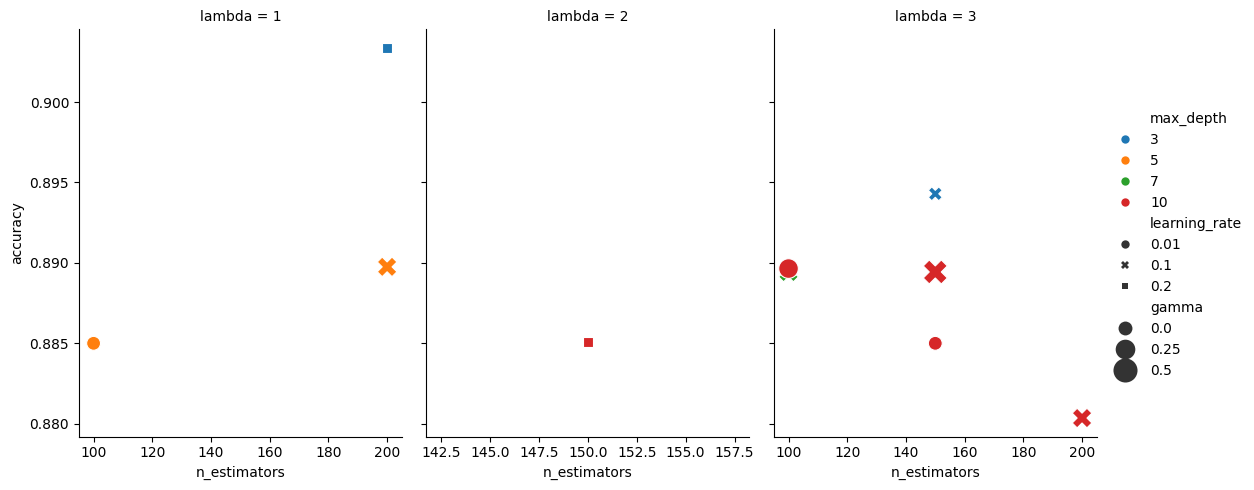

<ipython-input-59-a486f7cc4cdb>:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.relplot(


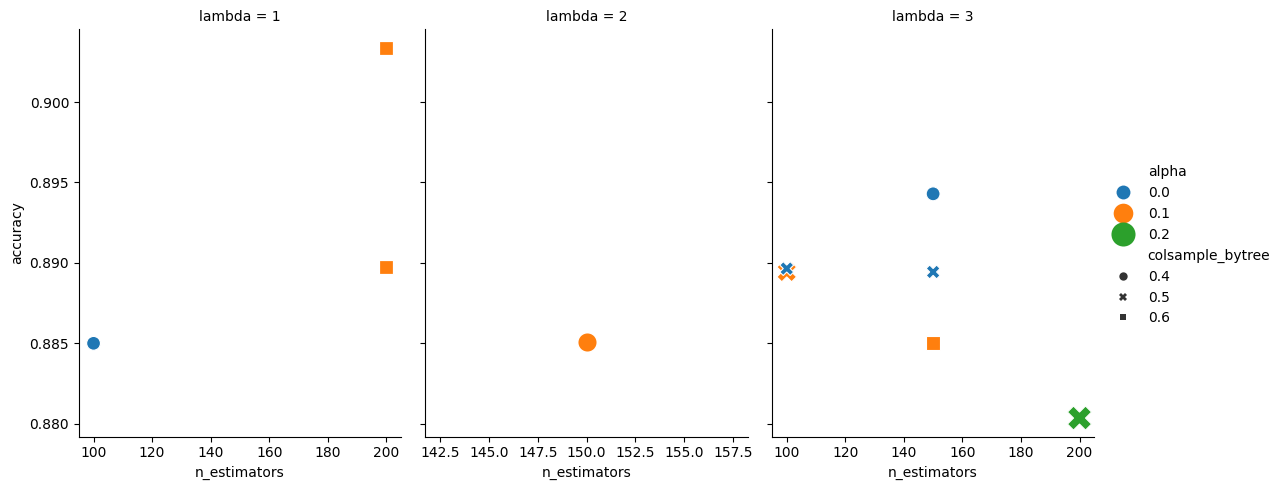

{'subsample': 0.5,
 'n_estimators': 200,
 'max_depth': 3,
 'learning_rate': 0.2,
 'lambda': 1,
 'gamma': 0,
 'colsample_bytree': 0.6,
 'alpha': 0.1}

In [59]:
# Plot the lines on facets
sns.relplot(
    data=results_XGB,
    x="n_estimators", y="accuracy",
    hue="max_depth", col="lambda",
    size="gamma", style="learning_rate",
    kind="scatter", palette=sns.color_palette("tab10"),
    height=5, aspect=.75, facet_kws=dict(sharex=False),
    sizes=(100,300)
)
plt.show()
# Plot the lines on facets
sns.relplot(
    data=results_XGB,
    x="n_estimators", y="accuracy",
    hue="alpha", col="lambda",
    size="alpha",
    style="colsample_bytree",
    kind="scatter", palette=sns.color_palette("tab10"),
    height=5, aspect=.75, facet_kws=dict(sharex=False),
    sizes=(100,300)
)
plt.show()

random_search.best_params_

Tanto XGBoost como Random Forest son algoritmos de aprendizaje automático populares y potentes, pero tienen diferencias en su funcionamiento y características. Aquí te presento algunas ventajas y desventajas de cada uno:

### Ventajas de XGBoost:

1. **Mayor precisión**: XGBoost tiende a ofrecer un rendimiento predictivo superior en comparación con Random Forest en muchos casos, especialmente en conjuntos de datos grandes y complejos.

2. **Regularización avanzada**: XGBoost ofrece técnicas avanzadas de regularización como la penalización L1 y L2, así como la reducción de la ganancia mínima en los nodos (gamma), lo que ayuda a prevenir el sobreajuste y mejorar la generalización del modelo.

3. **Eficiencia computacional**: XGBoost está diseñado para ser altamente eficiente en términos computacionales y puede paralelizarse fácilmente, lo que lo hace adecuado para el procesamiento de grandes conjuntos de datos.

4. **Flexibilidad en la función de pérdida**: XGBoost permite especificar una amplia gama de funciones de pérdida personalizadas, lo que lo hace adaptable a una variedad de problemas de regresión y clasificación.

### Desventajas de XGBoost:

1. **Sensibilidad a los hiperparámetros**: XGBoost puede ser sensible a los hiperparámetros y requiere una optimización cuidadosa para alcanzar su máximo rendimiento. Esto puede aumentar el tiempo necesario para ajustar el modelo correctamente.

### Ventajas de Random Forest:

1. **Menos propenso al sobreajuste**: Random Forest es menos propenso al sobreajuste en comparación con XGBoost, especialmente en conjuntos de datos pequeños o ruidosos, debido a su naturaleza de conjunto de modelos.

2. **Menos sensibilidad a los hiperparámetros**: Random Forest tiende a ser menos sensible a los hiperparámetros y generalmente requiere menos ajuste para obtener un buen rendimiento.

3. **Interpretación sencilla**: Random Forest proporciona una interpretación más sencilla de los resultados, ya que es fácil calcular la importancia de las características y visualizar la estructura del árbol.

### Desventajas de Random Forest:

1. **Menor precisión en ciertos casos**: En algunos conjuntos de datos complejos, Random Forest puede ofrecer un rendimiento predictivo inferior en comparación con XGBoost.

2. **Menos eficiente en conjuntos de datos grandes**: Random Forest puede volverse menos eficiente en términos computacionales y ocupar más memoria a medida que crece el tamaño del conjunto de datos.

XGBoost y Random Forest son algoritmos poderosos que tienen diferentes fortalezas y debilidades. La elección entre ellos depende del problema específico, las características del conjunto de datos y los objetivos de modelado. En general, XGBoost tiende a ser preferido cuando se busca la máxima precisión y se tiene un conjunto de datos grande, mientras que Random Forest puede ser una opción más adecuada cuando se prioriza la interpretabilidad del modelo o se trabaja con conjuntos de datos más pequeños.

### LightGBM

LightGBM es una biblioteca de gradient boosting desarrollada por Microsoft que se destaca por su eficiencia y velocidad en el entrenamiento de modelos de aprendizaje automático. Aquí hay una descripción de las características clave de LightGBM:

1. **Gradient Boosting Framework**: LightGBM implementa el algoritmo de gradient boosting, que es una técnica de aprendizaje automático ampliamente utilizada para mejorar la precisión de los modelos predictivos. Utiliza múltiples árboles de decisión débiles que se combinan para formar un modelo más robusto y preciso.

2. **Histograma de Gradient Boosting**: LightGBM utiliza una técnica de "histograma de gradientes" para dividir los nodos de los árboles durante el entrenamiento. En lugar de dividir los datos en puntos exactos, LightGBM agrupa los valores de características en intervalos discretos (histogramas), lo que reduce significativamente el tiempo de entrenamiento al evitar la búsqueda exhaustiva de los puntos de división óptimos.

3. **Optimización de la hoja del árbol**: LightGBM utiliza una estrategia de optimización de la hoja del árbol, que se enfoca en crecer los árboles por hojas en lugar de niveles. Esto significa que se agregan nodos a los árboles de manera eficiente y se optimizan para minimizar la pérdida de forma más efectiva.

4. **Eficiencia computacional**: LightGBM está diseñado para ser altamente eficiente en términos computacionales y puede manejar grandes conjuntos de datos y alta dimensionalidad. Su eficiencia en el entrenamiento lo hace ideal para aplicaciones donde el tiempo de entrenamiento es crítico.

5. **Control sobre la precisión y velocidad**: LightGBM ofrece parámetros para controlar la precisión y velocidad del modelo. Por ejemplo, puedes ajustar el parámetro `max_depth` para controlar la complejidad del modelo y la velocidad de entrenamiento.

6. **Tamaño del modelo**: LightGBM tiende a generar modelos más pequeños en comparación con otras bibliotecas de gradient boosting, lo que puede ser una ventaja en escenarios donde se requiere un menor consumo de memoria.

LightGBM es una biblioteca de gradient boosting eficiente y efectiva que se destaca por su velocidad de entrenamiento, manejo eficiente de conjuntos de datos grandes y capacidad para generar modelos de tamaño pequeño sin sacrificar la precisión. Es una opción popular para una variedad de problemas de aprendizaje automático, incluyendo clasificación, regresión y ranking.

In [31]:
%%time
# prompt: perform a lightgmb gridsearchcv for hyperparameter optimization

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb

# Define the parameter grid
param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 150, 200],
    'reg_lambda': [1, 2, 3],
    'reg_alpha': [0, 0.1, 0.2]
}

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(verbose=-100)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model,
                                   param_grid=param_grid,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1)

# Fit the model
grid_search.fit(X, y)

# Print the best hyperparameters
print(grid_search.best_params_)
results_LGB = pd.DataFrame(grid_search.cv_results_['params'])
results_LGB['accuracy'] = np.abs(grid_search.cv_results_['mean_test_score'])

results_LGB.head()

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'num_leaves': 20, 'reg_alpha': 0.1, 'reg_lambda': 2}
CPU times: user 8min 54s, sys: 14.9 s, total: 9min 9s
Wall time: 9min 32s


,learning_rate,max_depth,n_estimators,num_leaves,reg_alpha,reg_lambda,accuracy
0,0.01,3,100,20,0.0,1,0.884567
1,0.01,3,100,20,0.0,2,0.875370
2,0.01,3,100,20,0.0,3,0.875370
3,0.01,3,100,20,0.1,1,0.884567
4,0.01,3,100,20,0.1,2,0.875370


In [42]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'num_leaves': 20,
 'reg_alpha': 0.1,
 'reg_lambda': 2}

El modelo Extremely Randomized Trees (árboles extremadamente aleatorizados) es una técnica de aprendizaje automático que se basa en la idea de los árboles de decisión, pero con una variación clave en el proceso de construcción de cada árbol. A diferencia de los árboles de decisión tradicionales o Random Forest, donde se selecciona la mejor división para cada nodo basada en alguna medida de impureza como la ganancia de información o la Gini, los árboles extremadamente aleatorizados toman una ruta diferente.

Aquí hay una descripción de cómo funciona el modelo de Extremely Randomized Trees:

1. **Selección aleatoria de características**: En lugar de seleccionar la mejor división para cada nodo basándose en una medida de impureza, el modelo de Extremely Randomized Trees selecciona aleatoriamente un subconjunto de características en cada nodo y elige la mejor división entre ellas.

2. **Aleatorización adicional en la división**: Además de seleccionar aleatoriamente un subconjunto de características, el modelo también selecciona aleatoriamente los puntos de corte para cada característica en el subconjunto. Esto significa que la división en cada nodo se elige completamente al azar entre un conjunto limitado de opciones.

3. **Agregación de múltiples árboles**: Al igual que en Random Forest, el modelo de Extremely Randomized Trees utiliza múltiples árboles para formar un modelo más robusto y generalizable. Cada árbol se construye de manera independiente utilizando muestras de arranque y características aleatorias en cada división.

4. **Votación o promediado de predicciones**: Durante la etapa de predicción, la salida del modelo se calcula tomando el promedio o la votación de las predicciones de todos los árboles en el conjunto.

El modelo de Extremely Randomized Trees es una técnica de aprendizaje automático que se basa en la aleatorización adicional en la construcción de árboles de decisión para mejorar la robustez y la generalización del modelo. Al seleccionar características y puntos de corte de manera completamente aleatoria, el modelo busca reducir la varianza y el sobreajuste, lo que lo hace útil en una variedad de problemas de clasificación y regresión.

Los hiperparámetros del modelo de Extremely Randomized Trees (árboles extremadamente aleatorizados) varían según la implementación específica de la técnica en una biblioteca de aprendizaje automático. Sin embargo, aquí hay algunos hiperparámetros comunes que suelen estar disponibles en muchas implementaciones:

1. **n_estimators**: El número de árboles en el ensamble.

2. **max_depth**: La profundidad máxima de cada árbol en el ensamble.

3. **min_samples_split**: El número mínimo de muestras requeridas para dividir un nodo interno.

4. **min_samples_leaf**: El número mínimo de muestras requeridas para formar una hoja en un árbol.

5. **max_features**: El número de características a considerar al buscar la mejor división en cada nodo.

6. **bootstrap**: Si se deben usar muestras de arranque al construir árboles.

7. **random_state**: Controla la semilla aleatoria para la reproducibilidad de los resultados.

8. **criterion**: La función para medir la calidad de una división. Por ejemplo, "gini" para la impureza de Gini o "entropy" para la ganancia de información.

Estos son solo algunos de los hiperparámetros comunes. La disponibilidad y el significado específico de los hiperparámetros pueden variar entre las implementaciones de Extremely Randomized Trees en diferentes bibliotecas de aprendizaje automático. Es importante consultar la documentación de la biblioteca que estés utilizando para obtener información detallada sobre los hiperparámetros específicos disponibles y cómo ajustarlos para optimizar el rendimiento del modelo.

In [57]:
%%time
# prompt: perform a extremely randomized trees with gridsearchcv for hyperparameter optimization

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Extra Trees model
et_model = ExtraTreesClassifier()

# Perform GridSearchCV
grid_search_et = GridSearchCV(estimator=et_model,
                                   param_grid=param_grid,
                                   scoring='accuracy',
                                   cv=5,
                                   verbose=1)

# Fit the model
grid_search_et.fit(X, y)

# Print the best hyperparameters
print(grid_search_et.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
CPU times: user 2min 21s, sys: 676 ms, total: 2min 22s
Wall time: 2min 23s


In [43]:
# Use the best hyper-parameters
# best_XGB
best_XGB = random_search.best_estimator_

# Test how the model will perform if deployed
scores_xgb = cross_val_score(best_XGB, X, y, cv=cv_method)
print("Scores:", scores_xgb)

Scores: [0.45454545 0.90909091 0.86363636 0.95454545 0.95454545 0.86363636
 0.68181818 0.54545455 0.61904762 0.80952381]


In [44]:
# Use the best hyper-parameters
# best_XGB
best_LGB = grid_search.best_estimator_

# Test how the model will perform if deployed
scores_lgb = cross_val_score(best_LGB, X, y, cv=cv_method)
print("Scores:", scores_lgb)

Scores: [0.59090909 0.95454545 0.90909091 0.95454545 0.95454545 0.95454545
 0.72727273 0.86363636 0.66666667 0.76190476]


In [58]:
# Use the best hyper-parameters
# best_XGB
best_ET = grid_search_et.best_estimator_

# Test how the model will perform if deployed
scores_et = cross_val_score(best_ET, X, y, cv=cv_method)
print("Scores:", scores_et)

Scores: [0.54545455 0.95454545 0.86363636 1.         1.         0.95454545
 0.54545455 0.72727273 0.76190476 0.61904762]


,accuracy
model,
ET,0.797186
LGB,0.833766
RFClass,0.815368
RFreg,0.737662
XGB,0.765584


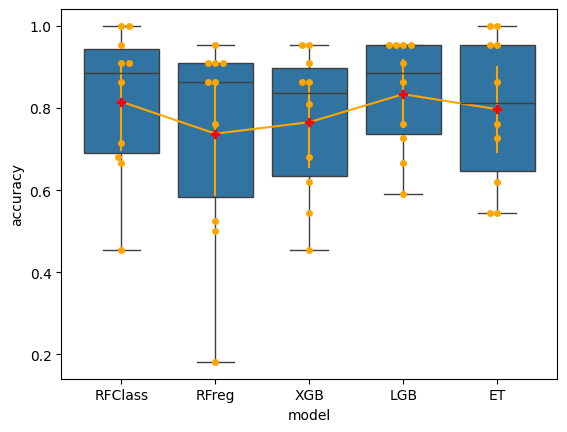

In [59]:
models_accuracy = pd.DataFrame({'accuracy': list(scores_class)+
                                list(scores_reg)+list(scores_xgb)+
                                list(scores_lgb)+list(scores_et),
                                'model': ['RFClass']*10 + ['RFreg']*10 +
                                ['XGB']*10 + ['LGB']*10 + ['ET']*10})

sns.boxplot(models_accuracy, x='model', y="accuracy")
sns.lineplot(models_accuracy, x='model', y="accuracy", err_style="bars", c="orange")
sns.swarmplot(models_accuracy, x='model', y="accuracy", c="orange")
plt.plot(models_accuracy.groupby('model').mean(), 'Pr')
models_accuracy.groupby('model').mean()

# Modelos ensemble para series temporales

Podemos adaptar Gradient Boosting Machines (GBM) o cualquier modelo ensemble a datos de series temporales implica considerar la estructura temporal de los datos para mejorar el rendimiento del modelo. Aquí hay algunas estrategias para adaptar GBM a series temporales:

1. **Creación de características temporales**: Genera características que capturen la información temporal, como tendencias, estacionalidad, rezagos (lags) de la variable objetivo y otras estadísticas resumidas de ventanas temporales anteriores.

2. **Ventana deslizante**: Divide la serie temporal en ventanas temporales y utiliza una ventana deslizante para entrenar el modelo en cada intervalo de tiempo. Esto permite al modelo capturar patrones temporales cambiantes a medida que se desplaza a lo largo del tiempo.

3. **Validación cruzada temporal**: Utiliza una validación cruzada temporal para evaluar el rendimiento del modelo. Mantén el orden temporal de los datos durante la validación cruzada para evitar el problema de fuga de información del futuro.

4. **Regularización**: Utiliza técnicas de regularización, como la penalización L1 y L2, para prevenir el sobreajuste del modelo a los datos temporales y mejorar la generalización.

5. **Hiperparámetros específicos de series temporales**: Algunas implementaciones de GBM pueden tener hiperparámetros específicos para series temporales, como la tasa de aprendizaje adaptativa (por ejemplo, en LightGBM) que puede ayudar a ajustar el ritmo de aprendizaje en función de la velocidad de cambio en los datos temporales.

6. **Modelos ensemble**: Entrena múltiples modelos GBM en diferentes subconjuntos de datos temporales y combina sus predicciones para obtener una predicción final. Esto puede ayudar a reducir la variabilidad y mejorar la estabilidad del modelo.

7. **Optimización de hiperparámetros**: Ajusta los hiperparámetros del modelo GBM utilizando técnicas de búsqueda como GridSearchCV o RandomizedSearchCV para encontrar la configuración óptima para el problema de series temporales específico.

Al adaptar GBM a series temporales, es importante considerar la estructura temporal de los datos y utilizar estrategias que aprovechen esta información para mejorar el rendimiento del modelo. Experimenta con diferentes enfoques y ajusta el modelo según sea necesario para obtener los mejores resultados en tu problema de series temporales.

### mlforecast

`mlforecast` es una biblioteca de Python diseñada para facilitar la creación y evaluación de modelos de pronóstico de series temporales utilizando técnicas de aprendizaje automático. Aquí hay una descripción general de algunas características clave de la biblioteca:

1. **Facilidad de uso**: `mlforecast` está diseñado para ser fácil de usar, permitiendo a los usuarios construir modelos de pronóstico de series temporales de manera rápida y sencilla.

2. **Modelos basados en aprendizaje automático**: La biblioteca proporciona una variedad de modelos de aprendizaje automático, como regresión lineal, árboles de decisión, Random Forest y Gradient Boosting Machines, que se pueden utilizar para pronósticos de series temporales.

3. **Funciones de preprocesamiento y transformación**: `mlforecast` ofrece funciones integradas para el preprocesamiento y la transformación de datos, lo que facilita la preparación de los datos antes de entrenar los modelos.

4. **Evaluación de modelos**: La biblioteca incluye herramientas para evaluar el rendimiento de los modelos de pronóstico, como métricas de error comunes y visualizaciones de resultados.

5. **Personalización y extensibilidad**: `mlforecast` permite a los usuarios personalizar y extender fácilmente los modelos y las funcionalidades según sus necesidades específicas.

Si estás interesado en pronósticos de series temporales utilizando técnicas de aprendizaje automático, `mlforecast` parece ser una opción prometedora para explorar.

### Requisitos

```Python
!pip install mlforecast
```

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from mlforecast import MLForecast
from window_ops.rolling import rolling_mean, rolling_max, rolling_min
from window_ops.ewm import ewm_mean
import ipywidgets as widgets
import ipywidgets

@ipywidgets.interact
def plot(lag1=[2,4,6,8,10], lag2=[4,6,8,10,12], rolm=[2,4,6]):

    fileC="https://raw.githubusercontent.com/marsgr6/ml-online/main/data/amazon_temperature.csv"

    df = pd.read_csv(fileC, encoding = "UTF-8", sep=",")

    train = df

    models = [make_pipeline(SimpleImputer(),
                            RandomForestRegressor(random_state=0, n_estimators=100)),
            XGBRegressor(random_state=0, n_estimators=100)]


    model = MLForecast(models=models,
                    freq=1,
                    lags=[lag1, lag2],
                    lag_transforms={
                        lag1: [(rolling_mean, rolm), (rolling_min, rolm), (rolling_max, rolm)], # aplicado a uma janela W a partir do registro Lag
                        lag2: [(ewm_mean, 0.5)],
                    },
                    #date_features=['week', 'month'],
                    num_threads=6)
    model.fit(train, id_col='Ciudad', time_col='Year', target_col='T Media')

    h = 9
    predictions = model.predict(h=h)
    predictions.rename(columns={"Pipeline": "RFRegressor"}, inplace=True)

    sns.set_theme(style="whitegrid")
    fig, ax = plt.subplots(nrows=10, ncols=2, figsize=(12, 24), gridspec_kw=dict(hspace=0.75))
    for i, (uid, axi) in enumerate(zip(df['Ciudad'].unique()[:20], ax.flat)):
        fltr = lambda df: df['Ciudad'].eq(uid)
        pd.concat([df.loc[fltr, ['Year', 'T Media']], predictions.loc[fltr]]).set_index('Year').plot(ax=axi)
        axi.set(title=uid, xlabel=None)
        if i % 2 == 0:
            axi.legend().remove()
        else:
            axi.legend(bbox_to_anchor=(1.01, 1.0))
    plt.show()
    print(lag1, lag2, rolm)

interactive(children=(Dropdown(description='lag1', options=(2, 4, 6, 8, 10), value=2), Dropdown(description='l…